# DATA EXPLORATION

The aim of this data exploration is to explain and to illustrate the different steps needed when approaching collected data with the purpose to analyze it. The first phase is to explore the data and to prepare it for the analysis. It is also referred to as 'Understanding the Data'. While there are sophisticated tools available for the analytical part together with the visualization of the data, we want to stress the importance of starting out with a systematic way of statistically analyzing the data in order to find out about important characteristics. This knowledge gained about the data makes the analytical work with high-level tools much more efficient. 

We are using a dataset about the life expectancy in different countries based on data collected by the World Health Organization (WHO) as presented in a Kaggle-project, see https://www.kaggle.com/kumarajarshi/life-expectancy-who



<br />
<br />

---


Appreciation and thanks for inspirations are due to the following people and their contributions:

- Philip Bowman for his excellent Kaggle-notbook on 'Life Expectancy: Exploratory Data Analysis', see: https://www.kaggle.com/kumarajarshi/life-expectancy-who
- Harshini Gadige for her Kaggle-notebook on 'Life Expectancy Cleaning,EDA,Feature Engineering', see: https://www.kaggle.com/harshini564/life-expectancy-cleaning-eda-feature-engineering
- Magnus Vilhelm Persson & Luiz Felipe Martins, 'Mastering Python Data Analysis', Birmingham, UK, Packt Publishing, 2016.
student project by Ladan Farbiz ladanfarbiz@yahoo.com for Malmo University



## Content and structure of this project


PART I: DATA PREPARATION
- 1. Reading and importing data into DataFrames
  - 1.1 Reading data from comma separated textfiles: pandas.read_csv()
  - 1.2 Reading selected data from data sources
- 2. DataFrames
  - 2.1 Accessing rows, columns and cells in a DataFrame
    - 2.1.1 Splicing
    - 2.1.2 Masking
  - 2.2 Defining own DataFrames
    - 2.2.1 Copying parts of DataFrames
    - 2.2.2 Renaming column names
    - 2.2.3 Setting a column as index
    - 2.2.4 Adding new columns
- 3. Manipulating Data
  - 3.1 Finding and handling missing values
    - 3.1.1 Deleting all the rows with missing values
    - 3.1.2 Setting missing values to a fixed value
    - 3.1.3 Interpolation within the values of a column
    - 3.1.4 Removing columns with missing values
    - 3.1.5 Removing the rest of missing data in the Life Expectancy data set
  - 3.2. Correcting wrong values
  - 3.3. Checking and converting data types
  - 3.4 Solving problems with thousand separators
  - 3.5 Converting Categorical Data
    - 3.5.1 Label Binarizer
    - 3.5.2 LabelEncoder
    - 3.5.3 OrdinalEncoder
    - 3.5.4 Dummy Variables 
  - 3.6 Aggregation of data
 

PART II: DATA EXPLORATION
- 5. Analyzing the feasibility of values
  - 5.1 Statistical description of single variables (univariate data)
  - 5.2 Removing unfeasible values
- 6 Univariate data analysis
  - 6.1. Histograms and Kernel Density Estimations (KDE)
      - 6.1.1. Interpretation of Histograms
  - 6.2 Boxplot and handling of outliers
      - 6.2.1 Boxplots
      - 6.2.2 Handling of outliers
- 7 Looking at relations between variables (Bivariate data analysis)
  - 7.1 Correlation between variables
      - 7.1.1 Heatmaps
      - 7.1.2 Scatterplots
      - 7.1.3 Joint distribution plots with a regression fit
      - 7.1.4 Plotting category dependencies
  - 7.2 Statistically relevant differences, t-test

PART III: USEFUL FUNCTIONS
- 4. Saving the Pre-Processed Data
   - 4.1 Pickling and Unpickling Data
   - 4.2 Saving the resulting dataset in excel

Clustering
5.1 Identifying 2 Clusters
5.1.1 K-means method
5.1.2 Comparison between clustering and classification into developing and developed countries
5.2 Identifying the optimal number of clusters
5.2.1 Identifying 3 clusters
5.2.2 Comparing clustering with all of the variables
5.2.3 Plotting the scatterplots of all of the significant single values
5.3 Dimensionality reduction
5.3.1 Scatterplot of reduced dimensions
5.3.2 Identifying countries


## Part I - DATA PREPARATION


# start
This is a Jupyter Notebook that combines narrative text with executable Python code. 


In [ ]:
#@title
# Import all libraries needed for this tutorial

# Pandas: used to create and work with DataFrames
import pandas as pd #imports all of pandas library
from pandas import DataFrame, read_csv #imports some of the important functions from the pandas library.

# Scikit-learn: import preprocessing functions
from sklearn.preprocessing import LabelEncoder, label_binarize, OrdinalEncoder

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Matplotlib: used for data visualization/plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
# Enable inline plotting, allows the plots to be seen in the notebook and stored with the document
%matplotlib inline

# numpy
import numpy as np

# seaborn: used for heatmaps and other statistical plots
import seaborn as sns #might require installation with: conda install -c anaconda seaborn

# Importing statistical function for t-test from scipy
import scipy.stats as stats

# import KMeans
from sklearn.cluster import KMeans
# import nearest neighbors
#from sklearn.neighbors import NearestNeighbors

# Saving variables as files on disk
import pickle

import warnings
warnings.filterwarnings("ignore") #some warnings are supressed

### Section defining File Paths - e.g. the path to your files, either on Colab or on your own computer
inputFilePath='/drive/My Drive/Colab Notebooks/MA661E/'  #'' 
outputFilePath='/drive/My Drive/Colab Notebooks/MA661E/'  #''
# mounting google drive if working in Colab - if not working on Colab do comment-out the following two rows
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


|Field|Description|
|---:|:---|
|Country|Country|
|Year|Year|
|Status|Developed or Developing status|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|percentage expenditure|Expenditure on health as a percene of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percentage of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|thinness 1-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9(%)|
|Income composition of resources|Income composition of resources|
|Schooling|Number of years of Schooling(years)|

## 1. Reading and importing data into DataFrames

The Pandas library contains high-level functions to import data from different sources (such as databases, web-pages) or to read data from files, see the overview at https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html. 


### 1.1 Reading data from comma separated textfiles: pandas.read_csv()
- Since the Kaggle-data is available as comma separated textfile, we can use the reading function read_csv

In [ ]:
#@title
#loading data from the csv-textfile into a pandas DataFrame-variable rawdata
# make sure to have the file 'LifeExpectancyData.csv' in your inputFilePath
rawdata=pd.read_csv(inputFilePath+'LifeExpectancyData.csv')
# showing the first 5 records
rawdata.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### 1.2 Reading selected data from data sources
T
Since most of these functions can be performed even after the import with help of DataFrames functionality, we will illustrate them under the DataFrame section. Working with DataFrames is more transparent than working with data files but less efficient. 


In [ ]:
#@title
#Example: Using the read_csv import function on the file 'LifeExpectancyData.csv' to import 
#the first 4 columns and translate their field names to Swedish.

exData=pd.read_csv(inputFilePath+'LifeExpectancyData.csv', header=0, usecols=[0,1,2,3],names=['Land','År','Status','Livslängd'])
# showing the first 5 records
exData.head(5)

,Land,År,Status,Livslängd
0,Afghanistan,2015,Developing,65.0
1,Afghanistan,2014,Developing,59.9
2,Afghanistan,2013,Developing,59.9
3,Afghanistan,2012,Developing,59.5
4,Afghanistan,2011,Developing,59.2


## 2. DataFrames
DataFrames are special variables in Pandas that allow to store vectors and matrices. Vectors are like an array of values and matrices are arrays of arrays, organized in rows and columns.Think of a data-sheet in excel, then the rows and columns are 'vectors' and the whole sheet or table is a 'matrix'.
If you are familiar with Matlab, you will recognize the similarity of DataFrames with Matlab's matrix variables.

A Pandas reference to the DataFrame API can be found here: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html


We will start by looking at the most important functionalities of DataFrames, such as:
- How to access rows and columns in DataFrames
- How to copy parts of DataFrames
- How to change column names and data types
- How to add columns

### 2.1 Accessing rows, columns and cells in a DataFrame
The proper way to address columns, rows and cells in a matrix is to use indexes. Mathematically, one for example writes A[i,j] to address an element in the matrix A that is located in the i-th row and j-th column. When addressing the entire i-th row one can write A[i,:], and similarly, A[:,j] corresponds to the entire j-th column.

With DataFrame one can use the function .iloc[] for the same thing. Be aware that the range of index for rows and columns (called axis) start with '0' and end with length-1. See the description of iloc[] here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html


In [ ]:
#@title
#Examples of addressing cells
print(rawdata.iloc[0,0], rawdata.iloc[100,12])

Afghanistan 96.0


When addressing rows, columns and cells by numeric indexes it is important to keep the indexes within the dimensions of the DataFrame. Use the attribute 'shape' of a DataFrame to get information about the number of rows and columns.

In [ ]:
#@title
# Example returning 2938 rows and 22 columns
rawdata.shape

(2938, 22)

Use a ':' when selecting the entire column or row:

In [ ]:
#@title
#example of selecting the first column
rawdata.iloc[:,0]

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
2933       Zimbabwe
2934       Zimbabwe
2935       Zimbabwe
2936       Zimbabwe
2937       Zimbabwe
Name: Country, Length: 2938, dtype: object

In [ ]:
#@title
#example of selecting the third row
rawdata.iloc[2,:]

Country                            Afghanistan
Year                                      2013
Status                              Developing
Life expectancy                           59.9
Adult Mortality                          268.0
infant deaths                               66
Alcohol                                   0.01
percentage expenditure               73.219243
Hepatitis B                               64.0
Measles                                    430
 BMI                                      18.1
under-five deaths                           89
Polio                                     62.0
Total expenditure                         8.13
Diphtheria                                64.0
 HIV/AIDS                                  0.1
GDP                                 631.744976
Population                          31731688.0
 thinness  1-19 years                     17.7
 thinness 5-9 years                       17.7
Income composition of resources           0.47
Schooling    

An important advantage of DataFrames is the possibility of having labels, both - for indexes (rows) as well as column names. Single columns can directly be addressed by its name, either in list-form (['column-name'], or in case the name does not contain spaces, -even as a attribute or dict-key (.cname).

In [ ]:
#@title
#example how to select the column 'GDP'
rawdata['GDP']

0       584.259210
1       612.696514
2       631.744976
3       669.959000
4        63.537231
           ...    
2933    454.366654
2934    453.351155
2935     57.348340
2936    548.587312
2937    547.358878
Name: GDP, Length: 2938, dtype: float64

In [ ]:
#@title
rawdata.GDP

0       584.259210
1       612.696514
2       631.744976
3       669.959000
4        63.537231
           ...    
2933    454.366654
2934    453.351155
2935     57.348340
2936    548.587312
2937    547.358878
Name: GDP, Length: 2938, dtype: float64

Selecting columns by their names requires that the name is spelled correctly, including right number of spaces. It is therefore a good idea to list all of the column names with the attribute 'columns'.

In [ ]:
#@title
# Example: Listing all column names of rawdata. Observe the spaces in several of the names!
rawdata.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

If you try, you will see that you can not add several column names as list or select some rows. This requires the use of the .loc[] function. It allows you to select rows by numbers and columns by names. 

In [ ]:
#@title
#Example of selecting the third row of the columns GDP and Schooling
rawdata.loc[2,['GDP','Schooling']]

GDP          631.744976
Schooling           9.9
Name: 2, dtype: object

#### 2.1.1 Splicing
One can also use intervals for the selection of rows and columns:
- For iloc[] the intervals are numeric in the form a:b, with a, b being integers so that a<b. The slices will be from a to b-1.
- For loc[], the intervals for the rows depend on the index. If the index is the default one it will be numeric like for iloc[]. But unlike for iloc, the slices will be from row a to row b The interval for the columns can use the names of the columns instead. Observe that the names given indicate the first and last column in the interval!
- Intervals can be designed in both orientations: left to right from first to last values, or right to left from last to first. The use of the minus-sign '-' indicates the 'reversed' order: -4, for example, means the forth-last element.

In [ ]:
#@title
#Example of slices with iloc[]: - first three rows of columns 2-5
rawdata.iloc[0:3,2:6]

,Status,Life expectancy,Adult Mortality,infant deaths
0,Developing,65.0,263.0,62
1,Developing,59.9,271.0,64
2,Developing,59.9,268.0,66


In [ ]:
#@title
#Example of slices with loc[]: - first three rows of columns from Status to Infant deaths
rawdata.loc[0:2,'Status':'infant deaths']

,Status,Life expectancy,Adult Mortality,infant deaths
0,Developing,65.0,263.0,62
1,Developing,59.9,271.0,64
2,Developing,59.9,268.0,66


#### 2.1.2 Masking
One can use normal conditions as well as boolesk expressions as part of the index-descriptions in order to find data that fulfills these conditions and expressions.

In [ ]:
#@title
#Example: Find all the information about Sweden
rawdata[rawdata['Country']=='Sweden']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2505,Sweden,2015,Developed,82.4,53.0,0,NaN,0.000000,67.0,22,...,98.0,NaN,98.0,0.1,5585.25847,9799186.0,1.5,1.4,0.909,15.9
2506,Sweden,2014,Developed,82.3,54.0,0,7.3,1142.212403,67.0,26,...,98.0,11.93,98.0,0.1,5918.19898,969611.0,1.5,1.3,0.906,15.8
2507,Sweden,2013,Developed,81.9,57.0,0,7.3,1212.666327,67.0,51,...,98.0,11.97,98.0,0.1,6283.24522,96379.0,1.4,1.3,0.904,15.8
2508,Sweden,2012,Developed,81.7,57.0,0,7.4,10947.023270,53.0,30,...,98.0,11.80,98.0,0.1,57134.77700,9519374.0,1.4,1.3,0.903,15.8
2509,Sweden,2011,Developed,81.7,58.0,0,7.4,11477.667100,42.0,26,...,98.0,11.70,98.0,0.1,59593.28711,9449213.0,1.4,1.3,0.901,16.0
2510,Sweden,2010,Developed,81.5,58.0,0,7.2,778.247747,NaN,6,...,98.0,9.47,98.0,0.1,5276.25591,9378126.0,1.3,1.3,0.895,15.8
2511,Sweden,2009,Developed,81.4,62.0,0,7.3,682.107061,NaN,3,...,98.0,9.94,98.0,0.1,4627.59200,9298515.0,1.3,1.3,0.898,15.8
2512,Sweden,2008,Developed,81.1,62.0,0,6.9,8105.590882,NaN,25,...,98.0,9.23,98.0,0.1,55746.84238,9219637.0,1.3,1.3,0.897,15.7
2513,Sweden,2007,Developed,89.0,63.0,0,6.9,7593.391622,NaN,1,...,98.0,8.92,98.0,0.1,53324.37937,914892.0,1.3,1.3,0.895,15.8
2514,Sweden,2006,Developed,88.0,64.0,0,6.5,6369.516139,NaN,19,...,98.0,8.95,98.0,0.1,46256.47160,9855.0,1.3,1.3,0.892,15.9


In [ ]:
#@title
#Example: same condition as part of a .loc[]
rawdata.loc[rawdata['Country']=='Sweden',:]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2505,Sweden,2015,Developed,82.4,53.0,0,NaN,0.000000,67.0,22,...,98.0,NaN,98.0,0.1,5585.25847,9799186.0,1.5,1.4,0.909,15.9
2506,Sweden,2014,Developed,82.3,54.0,0,7.3,1142.212403,67.0,26,...,98.0,11.93,98.0,0.1,5918.19898,969611.0,1.5,1.3,0.906,15.8
2507,Sweden,2013,Developed,81.9,57.0,0,7.3,1212.666327,67.0,51,...,98.0,11.97,98.0,0.1,6283.24522,96379.0,1.4,1.3,0.904,15.8
2508,Sweden,2012,Developed,81.7,57.0,0,7.4,10947.023270,53.0,30,...,98.0,11.80,98.0,0.1,57134.77700,9519374.0,1.4,1.3,0.903,15.8
2509,Sweden,2011,Developed,81.7,58.0,0,7.4,11477.667100,42.0,26,...,98.0,11.70,98.0,0.1,59593.28711,9449213.0,1.4,1.3,0.901,16.0
2510,Sweden,2010,Developed,81.5,58.0,0,7.2,778.247747,NaN,6,...,98.0,9.47,98.0,0.1,5276.25591,9378126.0,1.3,1.3,0.895,15.8
2511,Sweden,2009,Developed,81.4,62.0,0,7.3,682.107061,NaN,3,...,98.0,9.94,98.0,0.1,4627.59200,9298515.0,1.3,1.3,0.898,15.8
2512,Sweden,2008,Developed,81.1,62.0,0,6.9,8105.590882,NaN,25,...,98.0,9.23,98.0,0.1,55746.84238,9219637.0,1.3,1.3,0.897,15.7
2513,Sweden,2007,Developed,89.0,63.0,0,6.9,7593.391622,NaN,1,...,98.0,8.92,98.0,0.1,53324.37937,914892.0,1.3,1.3,0.895,15.8
2514,Sweden,2006,Developed,88.0,64.0,0,6.5,6369.516139,NaN,19,...,98.0,8.95,98.0,0.1,46256.47160,9855.0,1.3,1.3,0.892,15.9


In [ ]:
#@title
# Example: Combining conditions with logical expressions
rawdata[(rawdata['Country']=='Sweden') & (rawdata['Year']==2013) ]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2507,Sweden,2013,Developed,81.9,57.0,0,7.3,1212.666327,67.0,51,...,98.0,11.97,98.0,0.1,6283.24522,96379.0,1.4,1.3,0.904,15.8


In [ ]:
#@title
# Example: Combining conditions with logical expressions with list of values
rawdata[(rawdata['Country']=='Sweden') & (rawdata['Year'].isin([2013,2015]))]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2505,Sweden,2015,Developed,82.4,53.0,0,NaN,0.000000,67.0,22,...,98.0,NaN,98.0,0.1,5585.25847,9799186.0,1.5,1.4,0.909,15.9
2507,Sweden,2013,Developed,81.9,57.0,0,7.3,1212.666327,67.0,51,...,98.0,11.97,98.0,0.1,6283.24522,96379.0,1.4,1.3,0.904,15.8


### 2.2 Defining own DataFrames 
The rawdata that we imported above contains 22 columns or fields. Usually, one is only interested in a few of these columns. By selecting rows and columns as showed by the examples above, one can customize the data one wants to work with.
Usually one creates a new dataFrame variable as a copy of the selection using the function copy(). If one creates a new variable without copying the selection, a reference to the original data is being created. Changes made to the new variable will then also be made to the original. This can be useful if the entire data set is too large to work with. Instead, one can reference to different parts of the data sequentially.

#### 2.2.1 Copying parts of DataFrames 

In [ ]:
#@title
# Example: Defining a new dataFrame variable 'dFSelection' that consists of Country, Year, Status, Schooling and Life expectancy
dFSelection=rawdata.loc[:,['Country', 'Year', 'Status', 'Schooling','Life expectancy ']].copy()
dFSelection.head(3)

,Country,Year,Status,Schooling,Life expectancy
0,Afghanistan,2015,Developing,10.1,65.0
1,Afghanistan,2014,Developing,10.0,59.9
2,Afghanistan,2013,Developing,9.9,59.9


Some important things to notice in the example above:
- copy() generates a copy of the selection instead of a reference or view to the original data
- .loc is needed with a list of column names
- ':' returns all the rows
- the order of the columns correspond with the order of the list of the column names and not with the order in the original data
- Column names in the list must be spelled the way they are in the original data, otherwise new columns are created. Use the attribute 'columns' for a list of column names and their spellings

In [ ]:
#@title
rawdata.columns


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

#### 2.2.2 Renaming column names
In the example above, several column names contain empty spaces at the end as well as a between the words. This complicates accessing the column unneccessarily. 'Thinness 1-19 years' should actually read 10-19 years. We can use the function rename() to change the column names.

In [ ]:
#@title
# Example: Renaming the column names to eliminate spaces.
dfLE=rawdata.copy() #copying the rawdata

dfLE=dfLE.rename(columns={'Life expectancy ':'Life_expectancy',
                 'Adult Mortality':'Adult_Mortality',
                 'infant deaths':'infant_deaths',
                 'percentage expenditure':'percentage_expenditure',
                 'Hepatitis B':'Hepatitis_B',
                 'Measles ':'Measles',
                 ' BMI ':'BMI',
                 'under-five deaths ':'under-five_deaths',
                 'Total expenditure':'Total_expenditure',
                 'Diphtheria ':'Diphtheria',
                 ' thinness  1-19 years':'thinness_10-19_years',
                 ' thinness 5-9 years':'thinness_5-9_years',
                 'Income composition of resources':'Income_composition_resources'}
                )
dfLE.head(3)

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10-19_years,thinness_5-9_years,Income_composition_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [ ]:
#@title
dfLE.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', ' HIV/AIDS', 'GDP', 'Population', 'thinness_10-19_years',
       'thinness_5-9_years', 'Income_composition_resources', 'Schooling'],
      dtype='object')

#### 2.2.3 Setting a column as index
By default, the index for the rows are auto-incremented integer values, starting with zero (0). Any column can be used as row-index instead. A tutorial about indexing, selecting and assigning in DataFrames can be found here:
https://www.kaggle.com/residentmario/indexing-selecting-assigning

In [ ]:
#@title
# Example: Setting the countries as index for the rows
dFCountries=dFSelection.set_index('Country')
dFCountries.head(5)

,Year,Status,Schooling,Life expectancy
Country,,,,
Afghanistan,2015,Developing,10.1,65.0
Afghanistan,2014,Developing,10.0,59.9
Afghanistan,2013,Developing,9.9,59.9
Afghanistan,2012,Developing,9.8,59.5
Afghanistan,2011,Developing,9.5,59.2


- Country is used as index. As you can see, indexes do not need to be unique
- Index can be used to select rows

In [ ]:
#@title
# Example: Selecting all data from 'Sweden'
dFCountries.loc['Sweden',:]

,Year,Status,Schooling,Life expectancy
Country,,,,
Sweden,2015,Developed,15.9,82.4
Sweden,2014,Developed,15.8,82.3
Sweden,2013,Developed,15.8,81.9
Sweden,2012,Developed,15.8,81.7
Sweden,2011,Developed,16.0,81.7
Sweden,2010,Developed,15.8,81.5
Sweden,2009,Developed,15.8,81.4
Sweden,2008,Developed,15.7,81.1
Sweden,2007,Developed,15.8,89.0


#### 2.2.4 Adding new columns
New columns are simply added by pretending that the column already exists and will receive a new value.

In [ ]:
#@title
dFCountries.columns

Index(['Year', 'Status', 'Schooling', 'Life expectancy '], dtype='object')

In [ ]:
#@title
# Example: Adding a new column 'LifeSchooling' which is the ratio of life expectancy divided by average years of schooling
dFCountries['LifeSchooling']=dFCountries['Life expectancy ']/dFCountries.Schooling
dFCountries.head(5)

,Year,Status,Schooling,Life expectancy,LifeSchooling
Country,,,,,
Afghanistan,2015,Developing,10.1,65.0,6.435644
Afghanistan,2014,Developing,10.0,59.9,5.990000
Afghanistan,2013,Developing,9.9,59.9,6.050505
Afghanistan,2012,Developing,9.8,59.5,6.071429
Afghanistan,2011,Developing,9.5,59.2,6.231579


In [ ]:
#@title
dFCountries.columns

Index(['Year', 'Status', 'Schooling', 'Life expectancy ', 'LifeSchooling'], dtype='object')

## 3. Manipulating Data
Often, the data collected needs to be 'purified' from different kinds of impurities. Typical such problems are missing data, wrong data, special characters used for quotes, decimal points and thousand separators. Even the conversion of special data types, like dates or floating point values, unicode text, etc. are material for nightmares. Since most of the statistical methods and machine learnnig algorithms work purely on numeric data one usually also has to convert categorical data into numerical.

### 3.1 Finding and handling missing values

The way to find out how many missing values for each column there are is to use the .isnull() or .isna() function on DataFrames. They usually generate the same results, which allows the interpretation that 'null' and 'not a number (NaN)' are considered to be the same within DataFrames. These functions return a boolean value 'True' if a value is missing or 'False' if it is not missing. By summing upp all the 'Trues', meaning all the missing values, one can get the total of missing values per column or field or feature.

In [ ]:
#@title
# Example: Finding missing values in the original data
rawdata.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

As you can see, there are quite a few missing values, (the total can easely be calculated by summing up the sums with rawdata.isnull().sum().sum())

In [ ]:
#@title
rawdata.isnull().sum().sum()

2563

Hence, of 2938 records up to 2563 can contain missing values, in the worst case that is. We do not know how the missing values are distributed over the records or rows. In the worst case there is one missing value per row, e.g. 2563 rows. Most likely there will be more than one missing value per row.

Unfortunately, most computer applications and even data visualization tools have difficulties dealing with such missing values or produce strange results.
So the question is how to handle these missing values. Different scenarioes are possible:
- One way is to delete the whole row whenever there is a missing value present
- Another possibility is to set missing values to a fixed value, for example '0'. But putting an unknown value to '0' can be quite wrong, for example if it is the value for the polulation of a country.
- Instead of '0' or some other fixed value, one could set it to the mean value over all existing measurements or as the average value compared to values before and after. However, this only makes sense if the values to interpolate with are grouped according to 'Country'. Grouping is possible but interpolation over groups is rather complicated.
- Missing values, just like wrong values could be corrected by finding out the right values.
- If one column has many missing values one can argue that this field or feature is rather useless and can be dropped alltogether. 

#### 3.1.1 Deleting all the rows with missing values
If much data is available and the columns are important, the easiest way to deal with missing data is to remove all of the rows that are not complete. This is what the function 'dropna()' does.

In [ ]:
#@title
# Example: Deleting all the rows with missing data
dFDropna=rawdata.copy() #making coyp of the original data
print(dFDropna.shape)#dimension of the data before removing rows
dFDropna=dFDropna.dropna() #need to save results
print(dFDropna.shape)#dimension of the data after removing rows
print('Total number of missing values after dropna: ',dFDropna.isnull().sum().sum())

(2938, 22)
(1649, 22)
Total number of missing values after dropna:  0


- 1289 rows had to be removed in order to eliminate the 2563 missing values!

#### 3.1.2 Setting missing values to a fixed value
Sometimes, it might make sense to set unknown values to zero or to another fixed value, for example a minimum, maximum or average value.
The function 'fillna()' fills missing values with fixed values, see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna


In [ ]:
#@title
# Example: Fill the missing values for 'Diphtheria ' with zeroes.
dFDip=rawdata.copy() #making a copy of the original data
print('Number of missing data in Diphteria: ', dFDip['Diphtheria '].isnull().sum())
dFDip['Diphtheria '].fillna(value=0, inplace=True)# inplace=True means changes are saved in the dataFrame
print('Number of missing data in Diphteria: ', dFDip['Diphtheria '].isnull().sum())

Number of missing data in Diphteria:  19
Number of missing data in Diphteria:  0


In [ ]:
#@title
# Example: Fill the missing values for 'Diphtheria ' and Hepatitis_B with zeroes.

dfLE['Diphtheria'].fillna(value=0, inplace=True)# inplace=True means changes are saved in the dataFrame
dfLE['Hepatitis_B'].fillna(value=0, inplace=True)
print('Number of missing data in Diphteria: ', dfLE['Diphtheria'].isnull().sum())
print('Number of missing data in Hepatitis_B: ', dfLE['Hepatitis_B'].isnull().sum())

Number of missing data in Diphteria:  0
Number of missing data in Hepatitis_B:  0


#### 3.1.3 Interpolation within the values of a column
To interpolate unknown values based on known values is usually a good idea, but can be tricky. Usually one would like to interpolate based on similar values, e.g. measurements conducted close in time, values belonging to a cluster of similar data points, etc. To define on which values to interpolate is usually not that easy. Here, we only show the easiest way of interpolating on the values of the entire column.

In [ ]:
#@title
# Example: Interpolate the missing values for 'Income composition of resources' based on the values in the column
print('Number of missing data in Income composition of resources: ', 
      dfLE['Income_composition_resources'].isnull().sum())
dfLE['Income_composition_resources']=dfLE['Income_composition_resources'].interpolate()
print('Number of missing data in Income composition of resources: ', 
      dfLE['Income_composition_resources'].isnull().sum())

Number of missing data in Income composition of resources:  167
Number of missing data in Income composition of resources:  0


#### 3.1.4 Removing columns with missing values
If a column is not that important, for example if it contains a lot of missing values, it might as well be removed altogether. A row or a column can be deleted with the drop() function, see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop


In [ ]:
#@title
# Example: Removing the column 'Polio', assuming that Polio will be extinguished within a generation and therefore 
# can be removed
print('List of columns before removing "Polio": ', dfLE.columns)
dfLE.drop(columns='Polio', inplace=True)
# checking if the column 'Polio' has disappeared from rawdata
print('List of columns before removing "Polio": ', dfLE.columns)

List of columns before removing "Polio":  Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', ' HIV/AIDS', 'GDP', 'Population', 'thinness_10-19_years',
       'thinness_5-9_years', 'Income_composition_resources', 'Schooling'],
      dtype='object')
List of columns before removing "Polio":  Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Total_expenditure',
       'Diphtheria', ' HIV/AIDS', 'GDP', 'Population', 'thinness_10-19_years',
       'thinness_5-9_years', 'Income_composition_resources', 'Schooling'],
      dtype='object')


#### 3.1.5 Removing the rest of missing data in the Life Expectancy data set
- We tried to fill the missing data with some values instead of removing entire rows

Checking how much missing data that is left before removing it

In [ ]:
#@title
#Example: Comparing the amount of missing data left with the original amount of missing data
# Overview original data (rawdata)
print(rawdata.isnull().sum())
print('Total number of missing data: ',rawdata.isnull().sum().sum())
# Overview pre-processed data (dfLE)
print(dfLE.isnull().sum())
print('Total number of missing data: ',dfLE.isnull().sum().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
Total number of missing data:  2563
Country                           0
Year                              0
Status               

- 758 missing values less
- But still 1805 missing values left

In [ ]:
#@title
#Example: The missing values left are removed by removing the rows
dfLE=dfLE.dropna()
#checking that no missing values are left
print(dfLE.isnull().sum())
print('Total number of missing data: ',dfLE.isnull().sum().sum())
#documenting the number of rows and columns left in the data
print('Number of rows, number of columns: ', dfLE.shape)

Country                         0
Year                            0
Status                          0
Life_expectancy                 0
Adult_Mortality                 0
infant_deaths                   0
Alcohol                         0
percentage_expenditure          0
Hepatitis_B                     0
Measles                         0
BMI                             0
under-five_deaths               0
Total_expenditure               0
Diphtheria                      0
 HIV/AIDS                       0
GDP                             0
Population                      0
thinness_10-19_years            0
thinness_5-9_years              0
Income_composition_resources    0
Schooling                       0
dtype: int64
Total number of missing data:  0
Number of rows, number of columns:  (2101, 21)


### 3.2. Correcting wrong values
There are quite a few mistakes in the data which are also discussed on Kaggle's project page. It seems like the WHO did not have all the data available or that someone did a bad job putting the data together from different other datasets.
For example, different countries that usually are classified as 'developed' countries are missclassified as developing countries. Greece, Canada, France and Finland are mentioned.
- We will show how to set the status of the entries for Greece, Canada, France and Finland to 'developed'

We can filter these countries and look at their values for the field 'Status'.
The general principle for finding data that fulfills certain conditions is to:

1) ask for the index (usually the row-number) of all the values that fulfill the condition

2) use the index to show the whole row or some columns of the row

In [ ]:
#@title
# Example: In order to get all the rows with Country== Greece, we can use this list as index-list. 
rawdata[rawdata['Country']=='Greece']
# or with loc[]
#rawdata.loc[rawdata['Country']=='Greece']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1026,Greece,2015,Developing,81.0,72.0,0,NaN,0.000000,96.0,1,...,99.0,NaN,99.0,0.1,187.78991,182883.0,0.8,0.7,0.865,17.2
1027,Greece,2014,Developing,88.0,73.0,0,7.53,2163.043414,96.0,1,...,99.0,8.80,99.0,0.1,21673.78170,1892413.0,0.8,0.7,0.862,17.2
1028,Greece,2013,Developing,86.0,74.0,0,7.46,2183.106986,98.0,3,...,99.0,9.26,99.0,0.1,21874.81950,1965211.0,0.8,0.7,0.860,17.1
1029,Greece,2012,Developing,84.0,76.0,0,8.20,2528.992935,98.0,3,...,99.0,9.24,99.0,0.1,22242.68193,114511.0,0.8,0.7,0.858,16.8
1030,Greece,2011,Developing,85.0,76.0,0,8.02,3192.887363,95.0,40,...,99.0,9.77,99.0,0.1,25916.29353,1114899.0,0.8,0.7,0.860,16.7
1031,Greece,2010,Developing,83.0,76.0,0,9.00,3189.754439,95.0,149,...,99.0,9.18,99.0,0.1,26917.75898,11121341.0,0.8,0.7,0.859,16.4
1032,Greece,2009,Developing,80.0,78.0,0,9.08,372.685414,95.0,2,...,99.0,9.76,99.0,0.1,2971.97300,111717.0,0.8,0.7,0.857,16.2
1033,Greece,2008,Developing,79.9,77.0,0,9.51,3682.887170,95.0,1,...,99.0,9.76,99.0,0.1,31997.28210,1177841.0,0.8,0.7,0.853,15.9
1034,Greece,2007,Developing,79.4,8.0,0,9.67,3632.243121,95.0,2,...,99.0,9.41,99.0,0.1,28827.32636,1148473.0,0.8,0.7,0.855,16.4
1035,Greece,2006,Developing,79.7,77.0,0,9.42,318.580663,94.0,0,...,98.0,9.34,98.0,0.1,2481.15781,112362.0,0.8,0.7,0.850,16.3


In [ ]:
#@title
# This returns the list of all rows with Country== Greece. The list itself is a DataFrame.
# If we only want to check the field 'Status' of the rows with Greece, we can therefore write:
rawdata[rawdata['Country']=='Greece']['Status']

1026    Developing
1027    Developing
1028    Developing
1029    Developing
1030    Developing
1031    Developing
1032    Developing
1033    Developing
1034    Developing
1035    Developing
1036    Developing
1037    Developing
1038    Developing
1039    Developing
1040    Developing
1041    Developing
Name: Status, dtype: object

We see that the status is wrong and if we decide that it should read 'Developed' instead for 'Developing' we could try something like:
rawdata[rawdata['Country']=='Greece']['Status']='Developed'

However, Pandas asks us to use "Try using .loc[row_indexer,col_indexer] = value instead"

In [ ]:
#@title
# Example: Changing the status of Greece from Developing to Developed
rawdata.loc[rawdata['Country']=='Greece','Status']='Developed'

In [ ]:
#@title
# Checking if this worked with the same command as before:
rawdata[rawdata['Country']=='Greece']['Status'].head(4)

1026    Developed
1027    Developed
1028    Developed
1029    Developed
Name: Status, dtype: object

We can do the same for the other countries that we know have a wrong status one by one. A faster and easier way is to use a list of the names of these countries and to use the function isin(['a', 'b', 'c'])

In [ ]:
#@title
# Example: Changing the status of several countries at once in our pre-processing data frame dfLE
dfLE.loc[rawdata['Country'].isin(['Greece','Canada','France', 'Finland']),'Status']='Developed'
#testing with Greece
dfLE[dfLE['Country']=='Greece']['Status'].head(4)

1027    Developed
1028    Developed
1029    Developed
1030    Developed
Name: Status, dtype: object

### 3.3. Checking and converting data types
Transfering data from one operating system, database or application to another can result in errors or unknown data types. 
This means that the values in entire columns sometimes need to be changed, for example from integers to floating type values or vice versa. Often, ascii-based text is used since this is the type that is most alike in different systems. Problems appear when the text is unicode or when there are separators between the text like in the case of csv-files. Separators can appear at 'wrong' places causing a shift in the columns, for example.

We will use the attribute 'dtypes' to list the datatypes of the columns and the function 'astype()' for converting between different types. See also: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html?highlight=astype#pandas.DataFrame.astype

In [ ]:
#Example: Listing the data types of the different columns in the data.
rawdata.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

Most of the fields are already numeric and either of type int64 or float64. The fields that are described with 'object' are not - Country and Status both contain categories (e.g. text strings): Country in form of the different countries and Status whether a country is 'developing' or 'developed'. 

Some of the fields that are float64 are actually int. It is not neccessary to transform these values, but for the sake of an example we will do this for 'Adult Mortality'. For this to work, no unknown or missing values may be present in the data!

In [ ]:
#Example: How to change the type from float to int
dfLE=dfLE.astype({'Adult_Mortality': 'int64'})

In [ ]:
#Check the type of 'Adult_Mortality'
dfLE['Adult_Mortality'].dtypes

dtype('int64')

### 3.4 Solving problems with thousand separators
High numbers are sometimes written with thousand separators like for example: 2,156,624,900. Before such text can be converted to int64 numbers, the separators (in this example commas) need to be removed first.
One easy way to to this is to simply remove all of the commas.

In [ ]:
#Creating an example, since we do not have this case in our data
ex= DataFrame({'bignum': ['2,156,624,900', '44,768,444', '3,456','498']})
ex

,bignum
0,"2,156,624,900"
1,"44,768,444"
2,"3,456"
3,498


In [ ]:
# the type of the column bignum is object, meaning text
ex.dtypes

bignum    object
dtype: object

It cannot be transformed to int64, (try it!). All of the commas need to be removed first. One way to look for certain combinations of strings and numbers in order to replace them with something else is to use 'regex'. You can find a description at the following places:
- https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python
- https://en.wikipedia.org/wiki/Regular_expression

In [ ]:
# Example: replacing ',' (comma) with '' (nothing) in a 
# replace function. This kind of looking for patterns is called "regex"
## source: "pandas.DataFrame.replace", pandas user guide
ex=ex.replace(',', '',regex=True)
ex

,bignum
0,2156624900
1,44768444
2,3456
3,498


In [ ]:
# Now the values can be transformed
ex=ex.astype({'bignum': 'int64'})
print(ex)
print(ex.dtypes)

       bignum
0  2156624900
1    44768444
2        3456
3         498
bignum    int64
dtype: object


### 3.5 Converting Categorical Data
Usually, parts of the data will not be numerical. For example names, addresses, descriptions, are usually in text form. Some of the fields contain text or information that are categories. A category is a description from a list of possible things. Typical examples are the color of a car or its brand, the name of medicins, or the distinction between male and female.
Categories are elements in a set or list. They can have many different values, but they are countable. 
- If listed in a list, each category can be replaced by the ordernumber in the list. This is the principle behind the function **"LabelEncoder"**. 
- If the values are binary, meaning they are either 'A' or 'Not A', they can be replaced with '1' for being 'A' and '0' for not being 'A'. This is the idea behind the function **label_binarizer()**.
- Another way is to create new labels or fieldnames for each of the categories in the list with the values '1' if the category is present and a '0' for all the other categories. That is the principle of '**dummyVariables**'.

All of these functions solve the problem that categorical data needs to be transformed into numerical values in order to be able to use the data in statistical models or within machine learning.

The transformers with 'Label' in the name are thought to be used on one column only. Instead of 'LabelEncoder' one could use the function '**OrdinalEncoder()**' which allows to transform several columns at the same time.

The dataset on Life expectancy only contains two columns with categorical data: Country and Status. In order to be able to apply each one of the encoders mentioned above, we will make use of a trimmed version of the Nobel Laureates dataset from Kaggle, see: https://www.kaggle.com/nobelfoundation/nobel-laureates for a description of the entire data set and the different columns.


#### Preparing and loading the Nobel Laureates dataset
- Download the excel file 'NobelLaureates.xlsx' from Canvas and save it in the same folder as this notebook
- It contains the following columns from the original data set: Year, Category, Sex, Birth Country, Organization Name

In [ ]:
# Loading the Nobel Laureates data 'NobelLaureates.xlsx'
Nobel=pd.read_excel(inputFilePath+'NobelLaureates.xlsx')
Nobel.head(3)

,Year,Category,Sex,Birth Country,Organization Name
0,1901,Chemistry,Male,Netherlands,Berlin University
1,1901,Literature,Male,France,NaN
2,1901,Medicine,Male,Prussia (Poland),Marburg University


Regarding these 5 columns we can observe the following:
- 'Year' is already numeric (integer) and does not need to be transformed
- 'Sex' could be binary or some few categories. If it is binary, 'Label_binarizer' could be used. If it contains a few categories and the gender distinction is of importance, the transformation into dummy variables could be chosen.
- 'Birth Country' and 'Organization Name' both contain several categories. These columns could be converted one by one using 'Label encoder'. Using OrdinalEncoder, several columns can be converted at the same time.

In [ ]:
#Example: Finding out which categories there are, using the function 'unique()' as well as the numbers with nunique()
print('Nr of values in the list: ', Nobel.Category.nunique(),', categories in Category: ',Nobel.Category.unique())

Nr of values in the list:  6 , categories in Category:  ['Chemistry' 'Literature' 'Medicine' 'Peace' 'Physics' 'Economics']


In [ ]:
#Example: Finding out which categories there are, using the function 'unique()' as well as the numbers with nunique()
print('Nr of values in the list: ', Nobel.Sex.nunique(), ' categories in Sex: ',Nobel.Sex.unique())

Nr of values in the list:  2  categories in Sex:  ['Male' 'Female' nan]


In [ ]:
#Example: Finding out which categories there are, using the function 'unique()' as well as the numbers with nunique()
print('Nr of values in the list: ', Nobel['Birth Country'].nunique(), '\n categories in Birth Country: \n',Nobel['Birth Country'].unique())

Nr of values in the list:  121 
 categories in Birth Country: 
 ['Netherlands' 'France' 'Prussia (Poland)' 'Switzerland'
 'Prussia (Germany)' 'Schleswig (Germany)' 'India' 'Sweden' 'Norway'
 'Faroe Islands (Denmark)' 'United Kingdom' 'Russian Empire (Poland)'
 'Scotland' 'Spain' 'Russia' nan 'Poland' 'Germany'
 'Austrian Empire (Czech Republic)' 'Hungary (Slovakia)' 'Tuscany (Italy)'
 'Italy' 'United States of America' 'Bavaria (Germany)'
 'British India (India)' 'Austrian Empire (Italy)' 'New Zealand'
 'East Friesland (Germany)' 'Russian Empire (Ukraine)' 'Denmark'
 'Luxembourg' 'Russian Empire (Latvia)' 'Belgium' 'Hesse-Kassel (Germany)'
 'Germany (Russia)' 'Mecklenburg (Germany)' 'Austria' 'Prussia (Russia)'
 'Australia' 'Austria-Hungary (Slovenia)' 'Ireland' 'Canada'
 'Java, Dutch East Indies (Indonesia)' 'Austrian Empire (Austria)'
 'Germany (Poland)' 'W&uuml;rttemberg (Germany)' 'Argentina'
 'Austria-Hungary (Hungary)' 'Austria-Hungary (Austria)'
 'Austria-Hungary (Croatia)' 'Rus

In [ ]:
print('Nr of values in the list: ', Nobel['Organization Name'].nunique(), ', \n categories in Organization Name: \n',Nobel['Organization Name'].unique())

Nr of values in the list:  315 , 
 categories in Organization Name: 
 ['Berlin University' nan 'Marburg University' 'Munich University'
 'University College' 'Leiden University' 'Amsterdam University'
 'Stockholm University' 'Finsen Medical Light Institute'
 'École Polytechnique'
 'École municipale de physique et de chimie industrielles (Municipal School of Industrial Physics and Chemistry)'
 'Military Medical Academy' 'Royal Institution of Great Britain'
 'Institute for Infectious Diseases' 'Kiel University'
 'Sorbonne University' 'Pavia University' 'Madrid University'
 'University of Cambridge'
 'Landwirtschaftliche Hochschule (Agricultural College)'
 'Institut Pasteur' 'University of Chicago' 'Victoria University'
 'Goettingen University'
 'Königliches Institut für experimentelle Therapie (Royal Institute for Experimental Therapy)'
 'Leipzig University' 'Berne University'
 'Marconi Wireless Telegraph Co. Ltd.' 'Strasbourg University'
 'University of Heidelberg' 'Uppsala University' 

In [ ]:
#@title
#Example: Documenting the number of data points for each category with the function value_counts()
print('value counts of Category: \n', Nobel.Category.value_counts(), "\n\n")
print('value counts of Sex: \n', Nobel.Sex.value_counts(), "\n\n")
print('value counts of Birth Country: \n', Nobel['Birth Country'].value_counts(), "\n\n")
print('value counts of Organization Name: \n', Nobel['Organization Name'].value_counts(), "\n\n")


value counts of Category: 
 Medicine      227
Physics       222
Chemistry     194
Peace         130
Literature    113
Economics      83
Name: Category, dtype: int64 


value counts of Sex: 
 Male      893
Female     50
Name: Sex, dtype: int64 


value counts of Birth Country: 
 United States of America           276
United Kingdom                      88
Germany                             70
France                              53
Sweden                              30
                                  ... 
Russian Empire (Azerbaijan)          1
Bosnia (Bosnia and Herzegovina)      1
Southern Rhodesia (Zimbabwe)         1
Brazil                               1
Ukraine                              1
Name: Birth Country, Length: 121, dtype: int64 


value counts of Organization Name: 
 University of California                       34
Harvard University                             27
Stanford University                            18
Massachusetts Institute of Technology (MIT)    18
Unive

Data to be converted may not contain missing or undefinde (Nan) values. We simply remove them in our test-data set of Nobel Laureates.

In [ ]:
#@title
#Exampel: Checking for missing values
Nobel.isnull().sum()

Year                   0
Category               0
Sex                   26
Birth Country         26
Organization Name    247
dtype: int64

In [ ]:
#@title
#Example: Removing missing values
Nobel=Nobel.dropna()
Nobel.isnull().sum()

Year                 0
Category             0
Sex                  0
Birth Country        0
Organization Name    0
dtype: int64

#### 3.5.1 Label Binarizer
The column 'Sex' only contains the two categories 'Male' and 'Female'. Since we removed the missing values none are unknown any more. One could have grouped together the missing values and set them to a third category 'Unknown'.
By treating the values of 'Sex' as binary we can set either 'Male' or 'Female' to '0' and the other category to '1'.

In [ ]:
#Example: Binarizing the entries for 'Male' and 'Female' to '0' and '1'
lbNobel=Nobel.copy()
lbNobel.Sex=label_binarize(lbNobel.Sex, classes=['Male','Female'])
lbNobel.Sex.value_counts()

0    703
1     19
Name: Sex, dtype: int64

In [ ]:
#Example: Binarizing the entries for 'Male' and 'Female' to '1' and '0'
lbNobel=Nobel.copy()
lbNobel.Sex=label_binarize(lbNobel.Sex, classes=['Female','Male'])
lbNobel.Sex.value_counts()

1    703
0     19
Name: Sex, dtype: int64

#### 3.5.2 LabelEncoder
With LabelEncoder, all the different categories in a column receive unique numbers. If there are many such categories, like for example in the columns 'Birth Country' and 'Organization Name', the reference of the generated numbers back to their meaning might be difficult to obtain. One way is to keep the original column and to add a new column with the converted numbers. Another one is to use the labelEncoder's inverse_transform() function.


In [ ]:
#Example: Use of LabelEncoder to convert the categories in 'Organization Name' into a new column 'ON'
le = LabelEncoder() #defines the labelEncoder
nobCat=Nobel.copy()
nobCat['ON']=le.fit_transform(nobCat['Organization Name']) #label encoder learns from the data and then transforms it
nobCat.head(5)

,Year,Category,Sex,Birth Country,Organization Name,ON
0,1901,Chemistry,Male,Netherlands,Berlin University,14
2,1901,Medicine,Male,Prussia (Poland),Marburg University,137
5,1901,Physics,Male,Prussia (Germany),Munich University,159
6,1902,Chemistry,Male,Prussia (Germany),Berlin University,14
8,1902,Medicine,Male,India,University College,237


In [ ]:
#Example of using the inverse_transform to determine the original category
le.inverse_transform([14, 137, 159, 237])

array(['Berlin University', 'Marburg University', 'Munich University',
       'University College'], dtype=object)

#### 3.5.3 OrdinalEncoder
The Ordinal Encoder is similar to the Label Encoder. The difference is that it allows to transform several columns at once, while Label Encoder only transfers one column at the time.

We illustrate the use of Ordinal Encoder on the columns 'Category', and 'Birth Country':
- the ordinal encoder returns data as Series and not as DataFrames. One can turn them into DataFrames by using the DataFrame-constructor.
- The DataFrame constructor turns data into data frames with the column names indicated
- Since we want to add new columns to the existing data we add them to the existing ones

In [ ]:
#Example: Use of Ordinal Encoder on 'Category' and 'Birth Country'
oe = OrdinalEncoder() #defines the OrdinalEncoder
nobCat.loc[:,['CN','BCN']]=pd.DataFrame(oe.fit_transform(nobCat.loc[:,['Category','Birth Country']]),columns=['CN','BCN'])
nobCat.head(4)

,Year,Category,Sex,Birth Country,Organization Name,ON,CN,BCN
0,1901,Chemistry,Male,Netherlands,Berlin University,14,0.0,47.0
2,1901,Medicine,Male,Prussia (Poland),Marburg University,137,4.0,54.0
5,1901,Physics,Male,Prussia (Germany),Munich University,159,4.0,47.0
6,1902,Chemistry,Male,Prussia (Germany),Berlin University,14,4.0,47.0


#### 3.5.4 Dummy Variables
Sometimes one would like to treat the categories (numerical values) in the column more explicitly, kind of like binary values with '1' meaning that the category is present and '0' that it is not present. With help of 'dummy variables', each category in the column is transfered into an own column. If there are many different categories this will lead to many more columns and to what is called a 'sparse matrix' where most of the elements in the table are '0'.
We illustrate the use of 'dumy variables' for the column 'Sex'. Two new columns will be created 'Sex_Male' and 'Sex_Female. The function 'get_dummies()' automatically creates new columns with the combined name of the original column and the names of the categories, e.g. 'Sex' and 'Male' or 'Female' combined with a '_' between.

In [ ]:
#Example: Creating two 'dummy variables' for the column 'Sex'
# using the function get_dummies()
# see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html?highlight=get_dummies

nobCat=pd.get_dummies(nobCat, columns=['Sex'])
nobCat.head(5)

,Year,Category,Birth Country,Organization Name,ON,CN,BCN,Sex_Female,Sex_Male
0,1901,Chemistry,Netherlands,Berlin University,14,0.0,47.0,0,1
2,1901,Medicine,Prussia (Poland),Marburg University,137,4.0,54.0,0,1
5,1901,Physics,Prussia (Germany),Munich University,159,4.0,47.0,0,1
6,1902,Chemistry,Prussia (Germany),Berlin University,14,4.0,47.0,0,1
8,1902,Medicine,India,University College,237,2.0,23.0,0,1


### Converting categorical data in the Life Expectancy data set
Back to the converting of categorical data in the life Expectancy data set. There are only two columns with categorical data:
- 'Country' contains the names of all the countries
- 'Status' is a binary value that reads either 'Developing' or 'Developed'

We will add a column 'Country_Nr' for the converted number per country and binarize the column 'Status' into a new column 'Developed' with '1' and '0'.

In [ ]:
#Converting country names
le = LabelEncoder() #defines the labelEncoder
dfLE['Country_Nr']=le.fit_transform(dfLE['Country'])
#Converting Status
#make sure that 'Developed' becomes '1' and 'Developing' becomes '0'
print(dfLE.Status.value_counts())
dfLE.Status=label_binarize(dfLE.Status, classes=['Developing','Developed'])
print(dfLE.Status.value_counts())
# change the name of the column 'Status' to 'Developed'
dfLE.rename(columns={'Status':'Developed'}, inplace='True')
dfLE.head(4)

Developing    1651
Developed      450
Name: Status, dtype: int64
0    1651
1     450
Name: Status, dtype: int64


,Country,Year,Developed,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10-19_years,thinness_5-9_years,Income_composition_resources,Schooling,Country_Nr
0,Afghanistan,2015,0,65.0,263,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,Afghanistan,2014,0,59.9,271,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,Afghanistan,2013,0,59.9,268,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,Afghanistan,2012,0,59.5,272,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0


### 3.6 Aggregation of data
In the life expectancy data set, the data is organized after country and year. If one would like to compare different countries with one another one therefore needs to calculate averages over the different years.
To group data and to calculate averages for a group is also known as data aggregation.

In [ ]:
#Example: We group the data after their country names and calculate the averages in every feature.
#The result is stored in a new variable called LEAggregated. 
#The mean() value is being calculated and saved. Other functions like min(), max() or sum() could be alternatives
LEAggregated=dfLE.groupby(['Country']).mean()
LEAggregated.head(10)

,Year,Developed,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10-19_years,thinness_5-9_years,Income_composition_resources,Schooling,Country_Nr
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2007.5,0.0,58.193750,269.062500,78.250000,0.014375,34.960110,64.562500,2362.250000,15.518750,...,8.252500,52.312500,0.1,340.015425,9.972260e+06,16.581250,15.581250,0.415375,8.212500,0.0
Albania,2007.5,0.0,75.156250,45.062500,0.687500,4.848750,193.259091,98.000000,53.375000,49.068750,...,5.945625,98.062500,0.1,2119.726679,6.969116e+05,1.618750,1.700000,0.709875,12.137500,1.0
Algeria,2007.0,0.0,73.486667,114.133333,20.266667,0.406667,251.930923,56.066667,2069.266667,48.026667,...,4.604000,91.666667,0.1,2762.192757,2.043505e+07,6.100000,5.986667,0.691667,12.600000,2.0
Angola,2007.0,0.0,48.793333,328.133333,84.933333,5.740667,108.906953,37.866667,3790.866667,17.666667,...,3.919333,46.600000,2.4,1860.432998,1.063784e+07,6.053333,6.566667,0.453533,7.820000,3.0
Argentina,2007.0,0.0,75.080000,105.333333,10.266667,7.966667,824.574913,69.600000,2.133333,54.460000,...,6.912667,92.266667,0.1,6567.338537,1.856810e+07,1.080000,0.953333,0.792000,16.453333,4.0
Armenia,2007.0,0.0,73.306667,117.333333,1.000000,3.702667,139.741247,87.133333,290.333333,44.026667,...,4.861333,86.933333,0.1,2108.675087,1.063396e+06,2.033333,2.106667,0.695533,11.726667,5.0
Australia,2007.0,1.0,81.746667,63.466667,1.000000,10.155333,5687.708238,87.200000,105.933333,55.146667,...,8.836667,86.466667,0.1,33176.443543,3.306855e+06,0.673333,0.626667,0.916867,20.013333,6.0
Austria,2007.0,1.0,81.480000,65.800000,0.000000,12.236000,5257.001801,80.266667,61.800000,47.666667,...,4.715333,86.333333,0.1,33171.578263,6.330994e+06,1.720000,1.926667,0.860400,15.353333,7.0
Azerbaijan,2007.0,0.0,70.600000,115.000000,6.133333,0.992000,139.891997,48.866667,638.066667,43.266667,...,5.679333,81.400000,0.1,3519.456739,1.657906e+06,2.906667,2.946667,0.699000,11.260000,8.0


The groupby() function groups our data as wanted, but at the same time changed our index to the countries. This might be useful in a way, but we have not worked with indexes other than incremental numbers before. To avoid confusion,
we therefore change the index back to the way they were before

In [ ]:
#Changing indexes back to numbers
LEAggregated2=LEAggregated.copy() #making a copy in order to keep the data frame with country-indexes
LEAggregated=LEAggregated.reset_index()
LEAggregated.head(3)

,Country,Year,Developed,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10-19_years,thinness_5-9_years,Income_composition_resources,Schooling,Country_Nr
0,Afghanistan,2007.5,0.0,58.193750,269.062500,78.250000,0.014375,34.960110,64.562500,2362.250000,...,8.252500,52.312500,0.1,340.015425,9.972260e+06,16.58125,15.581250,0.415375,8.2125,0.0
1,Albania,2007.5,0.0,75.156250,45.062500,0.687500,4.848750,193.259091,98.000000,53.375000,...,5.945625,98.062500,0.1,2119.726679,6.969116e+05,1.61875,1.700000,0.709875,12.1375,1.0
2,Algeria,2007.0,0.0,73.486667,114.133333,20.266667,0.406667,251.930923,56.066667,2069.266667,...,4.604000,91.666667,0.1,2762.192757,2.043505e+07,6.10000,5.986667,0.691667,12.6000,2.0


In [ ]:
#@title
#Example: Pickling the variables rawdata, dfLE,LEAggregated, LEAggregated2 into a file with the name "Tutorial_T1_Results.pickle"
d_out=open(outputFilePath+"Tutorial_T1_Results.pickle","wb") #"wb" defines the writing mode for the file
pickle.dump([rawdata, dfLE,LEAggregated, LEAggregated2],d_out) #dump the content of the variables into the file
d_out.close() # never forget to close an open file!

The file with the name "Tutorial_T1_Results.pickle" should have been created in the same folder as this notebook.
It is good practice whenever pickling variables to make sure that the variables can be unpickled! Use new variable-names when unpickling.

In [ ]:
#@title
#Example: of unpickling the variables from the file with the name "Tutorial_T1_Results.pickle"
d_in = open(outputFilePath+"Tutorial_T1_Results.pickle","rb") # "rb" defines the reading mode for the file
# using other variable names
[rawdataX, dfLEX,LEAggregatedX, LEAggregated2X] = pickle.load(d_in)
d_in.close() # never forget to close an open file!

In [ ]:
#@title
# proof that it worked
dfLEX.head(3)


,Country,Year,Developed,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10-19_years,thinness_5-9_years,Income_composition_resources,Schooling,Country_Nr
0,Afghanistan,2015,0,65.0,263,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,Afghanistan,2014,0,59.9,271,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,Afghanistan,2013,0,59.9,268,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0


In [ ]:
#@title
#Example: Saving the pre-processed DataFrame dfLE in the excel file with the name "dfLE.xlsx" 
# into the excel-sheet dfLE.
# see: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel-writer
dfLE.to_excel(outputFilePath+'dfLE.xlsx', sheet_name='dfLE')


In [ ]:
#@title
#Example: Saving several DataFrame variables (dfLE,LEAggregated, LEAggregated2) in the same excel-file on 
# different sheets you need an "ExcelWriter"
with pd.ExcelWriter(outputFilePath+'Life Expectancy preprocessed data.xlsx') as writer:
    dfLE.to_excel(writer, sheet_name='dfLE')
    LEAggregated.to_excel(writer, sheet_name='LEAggregated')
    LEAggregated2.to_excel(writer, sheet_name='LEAggregated-country-inx')

## PART II: Exploring Data
Exploring data is mainly about developing an understanding for the kind of questions that the data can answer. In order to find out about what kind of conclusions one can draw from the data one needs to identify statistical patterns in the data. There are no fast given rules of how to best proceed and success is mainly based on building up an intuition for the different techniques that are suitable in each case from working on own datasets.

We continue to use the Life expectancy data set in this tutorial as prepared under tutorial T1. Hence, you will need to carry out the different steps from Tutorial T1 before running this tutorial. The obvious question one can ask regarding the life expectancy is regarding the different factors that relate or possibly result in higher life expectancy or in a wide variation of life expectancy among different countries and regions in the world. Another possibility offered by the data set is to focus on the question regarding the difference between 'developing' and 'developed' countries.

The aim of this tutorial is to examplify the usage of som typical techniques that are applied as part of data eploration. We start by looking at the single variables, analyzing some of their statistical characteristics, such as:

- statistical overview over min, max, mean values and standard deviation
- drawing a histogram
- looking at the kernel density estimates and the probability (distribution)
- generating box plot distributions

Once the single values are better understood, we can look at their inter-relationships, by plotting:
- bivariate scatterplots
- joint distributions
- heatmap
- kernel density estimation and regression


## 5. Analyzing the feasibility of values
The reason for analyzing single features is to see if the data contains values that are unfeasible or that lie far away from all the other values, so called outliers. Usually, one uses different statistical methods and data visualizations to identify outliers and errors. Before comparing features with one another, such outliers usually need to be handled and removed since they otherwise disturb the analysis. 

### 5.1 Statistical description of single variables (univariate data)
A good starting point to get a feeling for the single variables is to get an overview over their statistical description. By looking at the min- and max- values, the means and deviations and at the first, second and third quartil, one can get an idea about the range of the data, its center and how the data is spread from the center.

With the function describe(), we can get this information for the entire DataFrame, (or for individual features).

In [ ]:
#Example: The statistical description of the variable 'Life_expectancy'
dfLE.Life_expectancy.describe()

count    2101.000000
mean       68.672394
std         9.888540
min        36.300000
25%        62.200000
50%        71.400000
75%        75.400000
max        89.000000
Name: Life_expectancy, dtype: float64

- The average of life expectancy of the 2101 data points is 68.7 years with a standard deviation of 9,88 years
- The minimum of life expectancy is 36,3 years, the maximum 89 years

In [ ]:
#Example: Statistical description of all the variables
dfLE.describe()

,Year,Developed,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10-19_years,thinness_5-9_years,Income_composition_resources,Schooling,Country_Nr
count,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,...,2101.000000,2101.000000,2101.000000,2101.000000,2.101000e+03,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000
mean,2007.000476,0.214184,68.672394,169.467396,34.604474,4.734936,903.247652,62.175155,2634.751547,37.197715,...,6.017492,81.198001,2.156259,6717.857477,1.293097e+07,4.906521,4.966683,0.619140,11.920514,69.786768
std,4.319336,0.410353,9.888540,130.520699,135.222283,4.054333,2243.788156,39.681443,11822.505306,19.742718,...,2.364225,24.273498,5.860752,13798.920432,6.316978e+07,4.707947,4.805755,0.210464,3.329968,40.755312
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,1.400000,...,0.370000,0.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,62.200000,71.000000,0.000000,0.970000,31.635765,8.000000,0.000000,18.500000,...,4.400000,77.000000,0.100000,416.583970,1.876650e+05,1.500000,1.500000,0.480000,9.900000,34.000000
50%,2007.000000,0.000000,71.400000,146.000000,3.000000,4.130000,127.763200,83.000000,17.000000,42.000000,...,5.890000,92.000000,0.100000,1463.213573,1.341588e+06,2.900000,3.100000,0.665000,12.100000,70.000000
75%,2011.000000,0.000000,75.400000,235.000000,22.000000,7.570000,561.916864,95.000000,448.000000,55.500000,...,7.690000,96.000000,1.200000,5116.454240,7.265115e+06,7.400000,7.500000,0.766000,14.300000,105.000000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.100000,...,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.945000,20.700000,140.000000


Studying this table, we focus first on the max and min values of the different features to find values that are not feasible, such as:
- infant deaths, measles and under-five deaths: a max over 1000 is not feasible since this are ratio-values between 0 and 1000. We should drop values above this limit as they are not feasible and therefore not reliable.

- percentage expenditure: Unclear how to interpret the numbers? A mean value of 900% of gdp spent on health care seems like 100 times too large. 9% would probably be more realistic. In Sweden this value for 2018 was 11%. We do not know what to do with this and leave it as it is at the moment. 

- BMI: min=1.4 and max=77 are non-realistic values for BMI. A BMI of 15 or lower is seriously underweight and a BMI of 40 or higher is morbidly obese. We will drop this column altogether since we do not regard it as being reliable altogether.

- population: Is there a country with only 34 inhabitants? Maybe it is just an outlier.

Many of the other variables have rather extreme max-values if compared with the values for the first, second and third quartile. There are a lot of issues with this data which are also discussed in the Kaggle project. We see this as a chance to show different ways of finding and partly dealing with corrupt data.

### 5.2 Removing unfeasible values
As discussed during the analysis of the statistical description table above, we want to:
  - i) drop values that are more or equal to 1000 for infant_deaths, under-five_deaths and Measles, and to 
  - ii) drop the column 'BMI' altogether.

Since eliminating the values will delete whole rows of data, we might want to make sure that we will not loose too many rows. If that is a risk, we might instead set the values to the mean-value or to the max-value

In [ ]:
#Example: Calculating the number of rows that we would like to delete
((dfLE['infant_deaths']>=1000) | (dfLE['under-five_deaths']>=1000)| (dfLE['Measles']>=1000)).sum()

401

- 401 of 2101 values is almost 20%, which is too much. Let us investigate if there are differences in this number for the three columns

In [ ]:
#Example: Specifying the numbers of unfeasible values per column
print('infant_deaths: ',(dfLE['infant_deaths']>=1000).sum())
print('under-five_deaths: ',(dfLE['under-five_deaths']>=1000).sum())
print('Measles: ',(dfLE['Measles']>=1000).sum())

infant_deaths:  14
under-five_deaths:  15
Measles:  401


- The results reveal, that most of the unfeasible values are due to the column 'Measles'. Instead of deleting 20% of the data it is better to remove the column 'Measles'

In [ ]:
#Example: Deleting the columns 'Measles' and 'BMI' with drop()
dfLE=dfLE.drop(columns=['Measles','BMI'])
#checking to make sure that the columns have disappeared
dfLE.columns

Index(['Country', 'Year', 'Developed', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'under-five_deaths', 'Total_expenditure', 'Diphtheria', ' HIV/AIDS',
       'GDP', 'Population', 'thinness_10-19_years', 'thinness_5-9_years',
       'Income_composition_resources', 'Schooling', 'Country_Nr'],
      dtype='object')

In [ ]:
#Example: deleting the unfeasible values of infant_deaths and under-five_deaths
dfLEbackup=dfLE.copy() #usually a good idea to make a backup before experimenting
#strangely, the line below did not work!
#dfLE=dfLE.drop(dfLE[((dfLE['infant_deaths']>=1000) | (dfLE['under-five_deaths']>=1000))].index)
#instead one can first save the index and then use this temporary variable in drop()
delIndex=dfLE[((dfLE['infant_deaths']>=1000) | (dfLE['under-five_deaths']>=1000))].index
dfLE=dfLE.drop(delIndex)
#checking to make sure the values are gone
((dfLE['infant_deaths']>=1000) | (dfLE['under-five_deaths']>=1000)).sum()

0

In [ ]:
# Counting the rows and columns left
dfLE.shape

(2086, 20)

In [ ]:
# We can check if we succeeded by generating the statistics of the corresponding features:
dfLE.loc[:,['infant_deaths','under-five_deaths']].describe()

,infant_deaths,under-five_deaths
count,2086.000000,2086.000000
mean,24.806807,35.105465
std,66.408355,96.161966
min,0.000000,0.000000
25%,0.000000,1.000000
50%,3.000000,4.000000
75%,21.000000,27.000000
max,576.000000,943.000000


## 6. Univariate data analysis
Now that we have eliminated all missing data and the most obvious unfeasable data, we are ready to look closer at the statistical properties of the single values. 

### 6.1. Histograms and Kernel Density Estimations (KDE)
With histograms we can display the distribution of quantitative data. Real data may not conform to standard models in classical statistics. One way to approximate the density of the distribution (assuming that it is continuous) is to use the method called "Kernel Density Estimation (KDE)". It can be though of as a 'smoothed histogram'.

#### 6.1.1. Interpretation of histograms
Some of the questions that can be answered by looking at the histogram of a variable are for example:
- is the distribution approximately 'unimodal', meaning that there is only one significant 'mountain'? Small gaps and peaks are not considered since they are most likely due to sample randomness.
- is the distribution asymmetrical?
- what is the range of the distribution, where is it centered? Is there a clear highest point or not?
- are there any unusual features, such as outliers, gaps or clusters?

In [ ]:
c= dfLE.columns
c[1]

'Year'

Since there are many variables to investigate, we will use a for loop for plotting all of the histograms and their KDE in subplots.

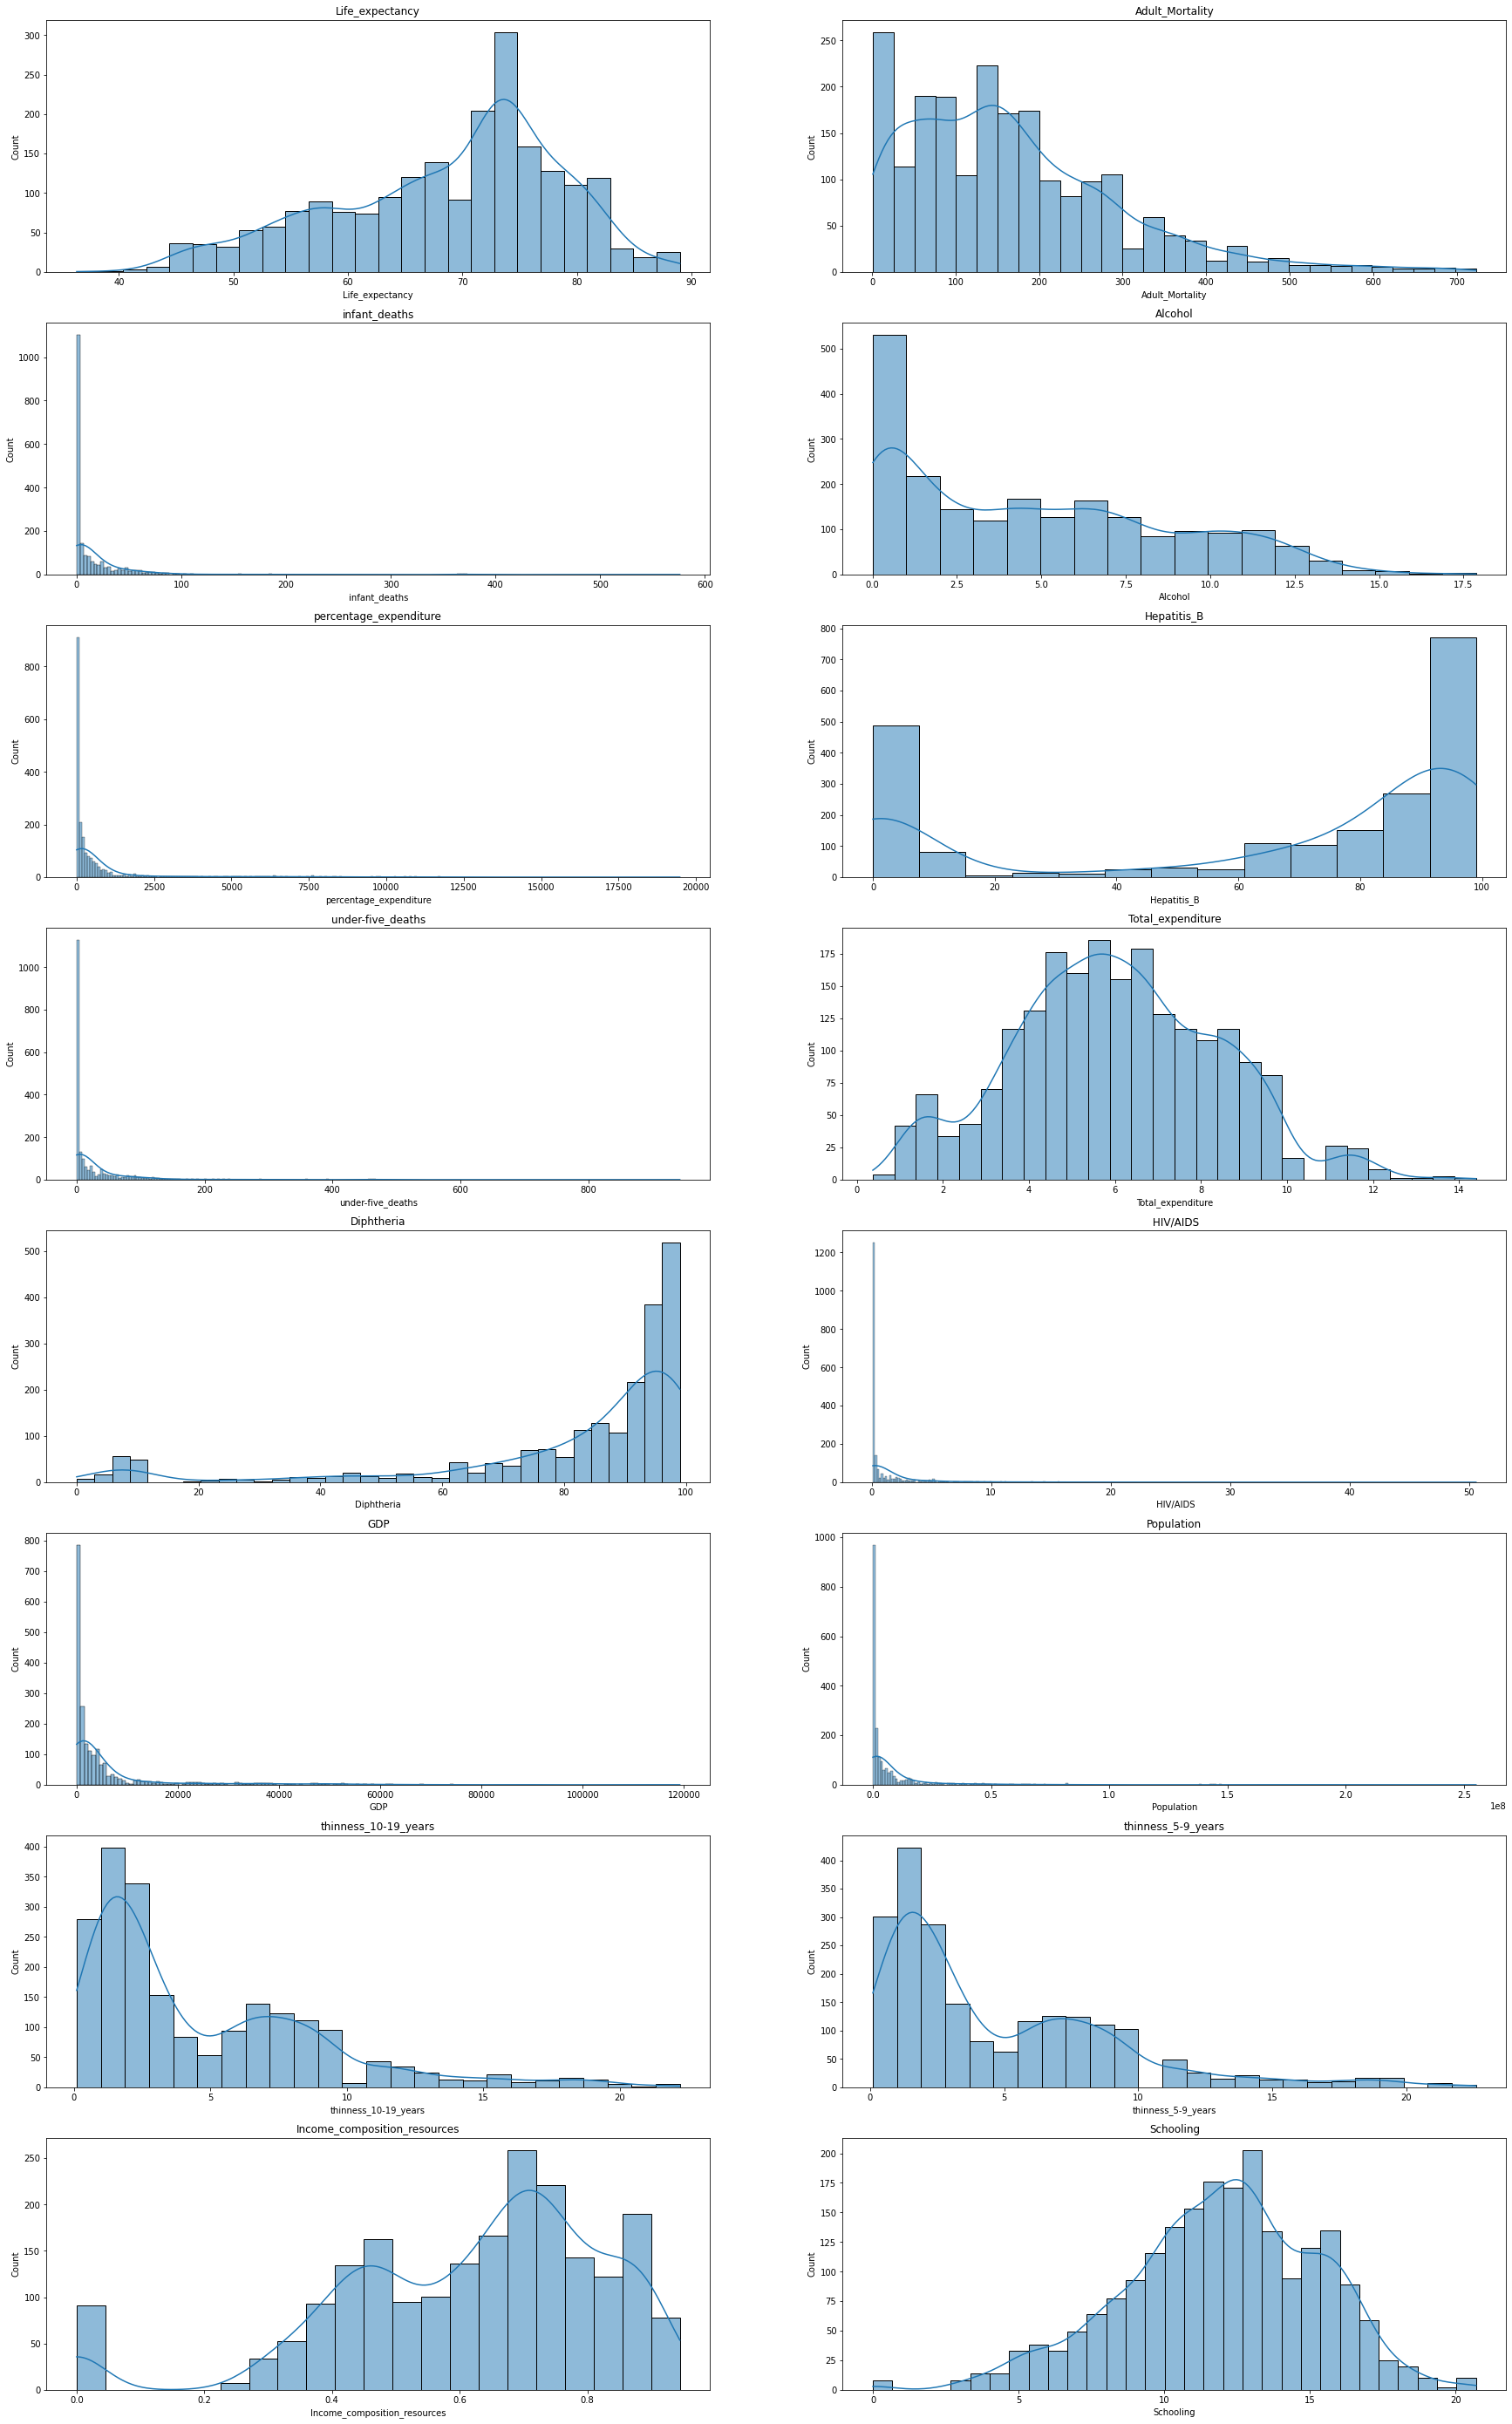

In [ ]:
#Example: plotting histogram and KDE of several values in a for-loop
columns=['Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'under-five_deaths', 'Total_expenditure', 'Diphtheria', ' HIV/AIDS',
       'GDP', 'Population', 'thinness_10-19_years', 'thinness_5-9_years',
       'Income_composition_resources', 'Schooling']
#OBS: we could have made work easier by setting columns=dfLE.columns

fig=plt.figure(figsize=(30,50)) #16 plots in 2 columns =>8 rows
i=1
for col in columns:
    plt.subplot(8,2,i)
    #combination of histogram and KDE with seaborns histplot()
    sns.histplot(x=dfLE[col], kde=True)
    plt.title(col) #setting title of the histogram to the name of the column
    i=i+1


Discussion of the different plots
- The curves and histograms that are closest to a normal distribution are: 'Life_expectancy', 'Total_expenditure' and 'Schooling.
- 'thinness_1-19_years' and 'thinness_5-9_years' have similar curves whith 'fading' waves starting with the highest top at low values.
- 'infant_deaths', 'percentage_expenditure','under-five_deaths','HIV/AIDS','GDP', and 'Population' have outliers that are so much higher than most of the data that the distribution cannot be seen in the resulting scale.
- 'Hepatitis_B', 'Diphtheria' and 'Income_composition_resources' have two tops, one in the lower and one in the higher value-segment.

### 6.2 Boxplot and handling of outliers
Outliers are values that lie outside the 'normal' range as defined by the probability distribution of all the other values. There is no clear universally accepted definition of what an outlier is. There are different ways to identify outlier values and in pandas this is done heuristically. One can plot outliers as part of 'boxer-plots' and they are partly also visible in histograms.
Outliers can be interesting to look closer into as they can indicate interesting phenomenons or defects. However, for the general understanding of the data and the relationships between different variables, outliers complicate the analysis and are unwanted.

There are different ways to deal with outliers once they are identified:
- they can be removed,
- they can be set to upper and lower limits without changing too much of the statistical characteristics,
- they remain but are transformed together with all the other data using log/inverse/square root/etc

Since we want to keep things simple, we will either remove the outliers or setting them to some limits that do not change the statistical properties too much. 


#### 6.2.1 Boxplots
Boxplot is a very old, but still useful, graphical tool to display the center and spread of the data.
see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html
and on Wikipedia:https://en.wikipedia.org/wiki/Box_plot

A boxplot is a standardized way of displaying the values based on: the minimum, the maximum, the sample median, and the first and third quartiles.

- The horizontal bars at the bottom and top (called the whiskers of the boxplot) represent the minimum and maximum of the data points, excluding any outliers.
- The bottom and top of the box represent the 25% and 75% quartiles. The lower quartile is the median of the lower half of the dataset. The upper quartile is the median of the upper half of the dataset.
- The line inside the box represents the median or 50% quartile.
- Any data not included between the whiskers should be plotted as an outlier with a dot, small circle, or star.

A quick way to interpret a boxplot is to remember that, excluding outliers, 50% of the data values are inside the box, 25% are below the box and 25% are above the box.

Drawing a boxplot next to the corresponding histogram with kde illustrates well how boxplots and kernel density estimations illustrate identical statistical means. The location of outliers as points outside of the boxer whiskers seems more intuitive in boxer plots than in histograms.

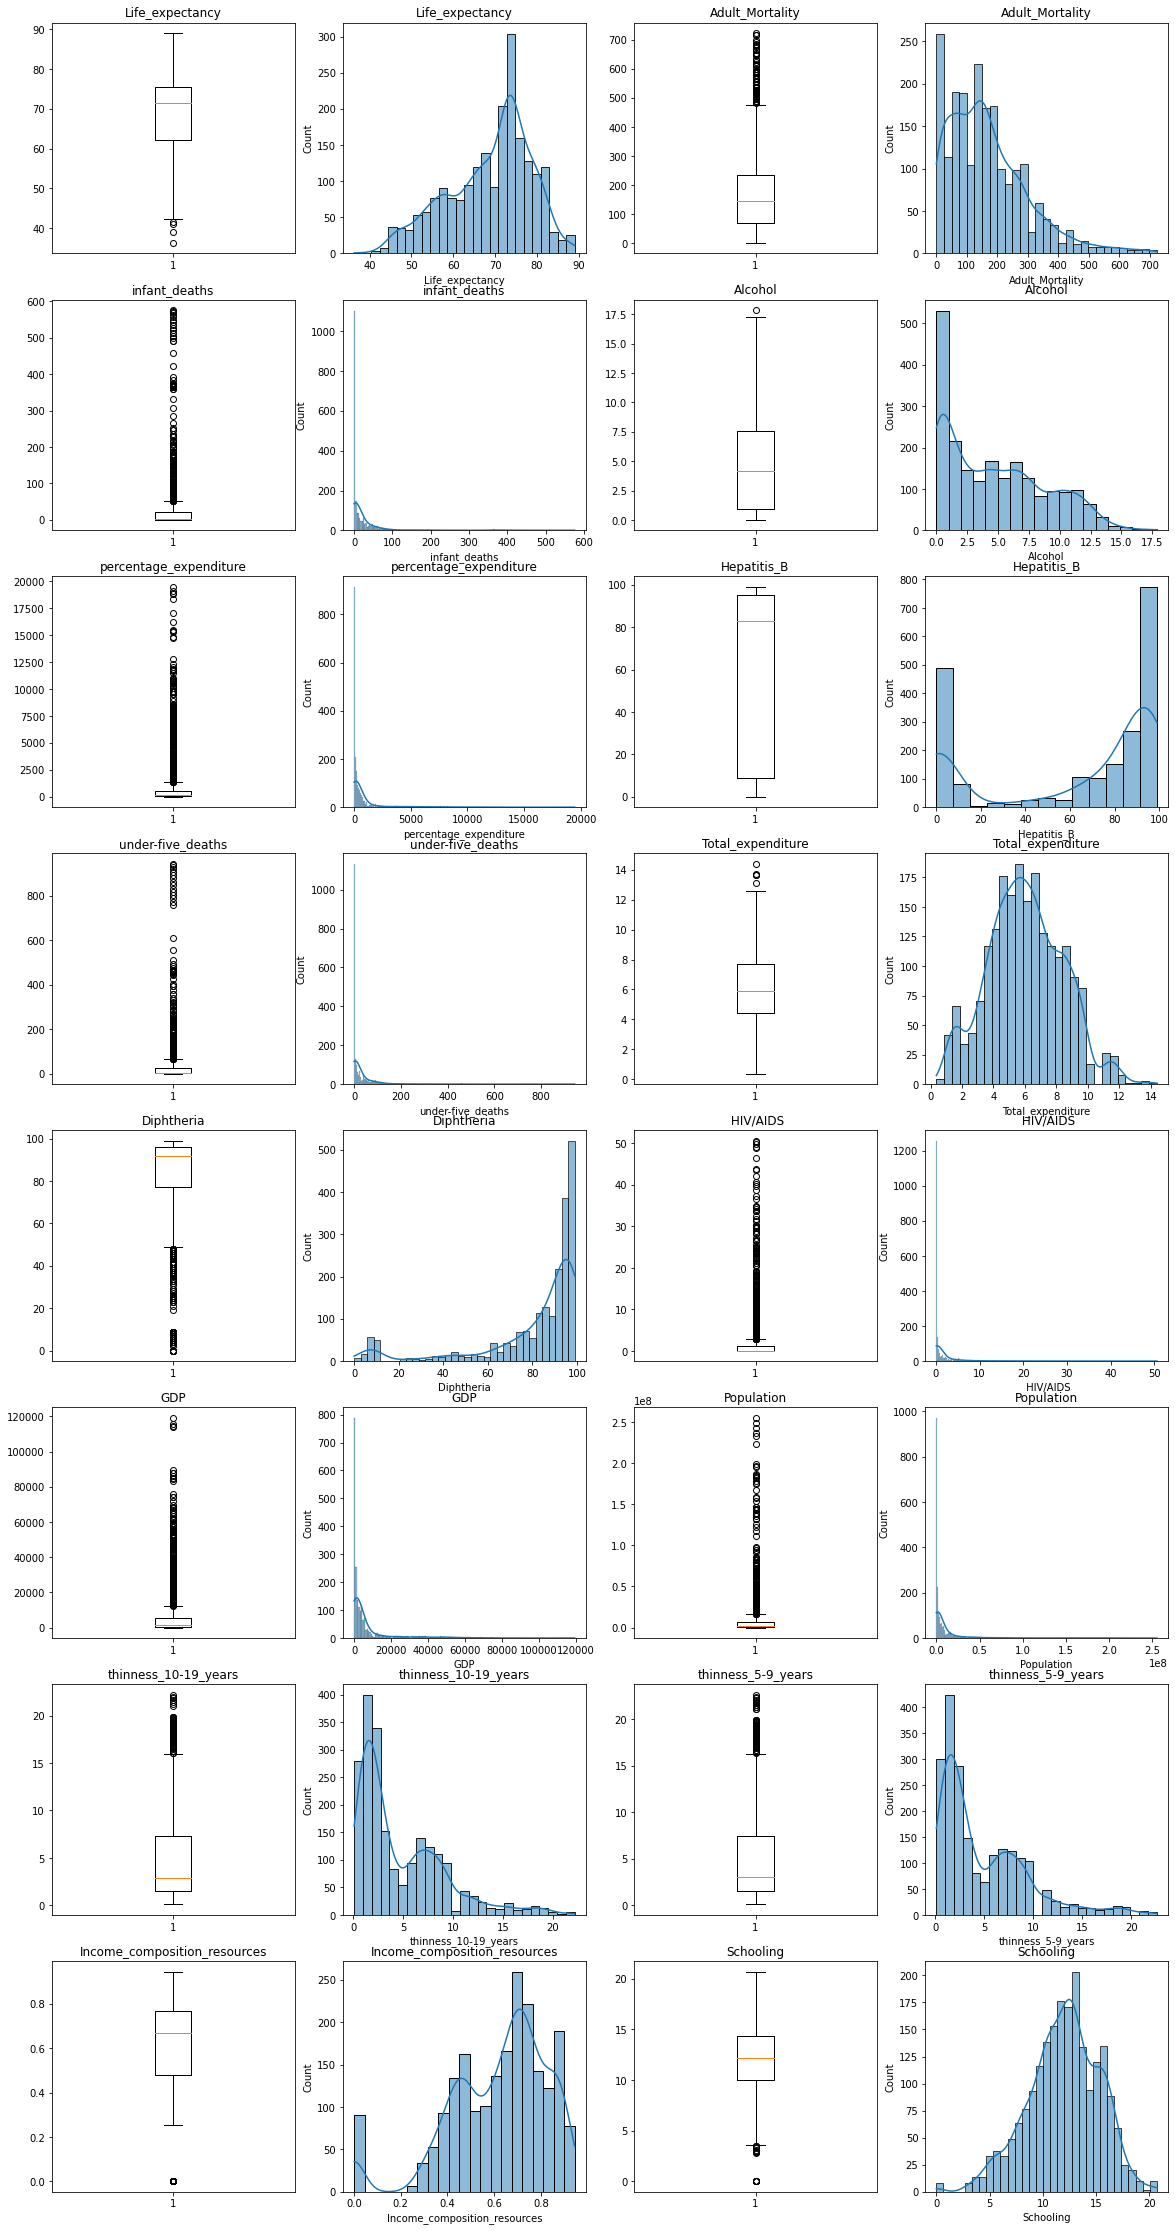

In [ ]:
# Example: Showing boxplots and histograms with kde of all the 18 numerical features. 
fig=plt.figure(figsize=(20,45)) # size of one single plot-figure, found by trial-and-error
i=0 # setting the initial figure number to 0. One can do this a lot more elegantly, but this works and is straightforward
for col in columns: #all columns except country, year and Developed are in the iteration list
    i=i+1 #increasing the number of the figure so that they find to the right place
    plt.subplot(9,4,i) # reserving the i-th place in the 9 times 4 subplot
    plt.boxplot(dfLE[col]) # creating the boxplot which is added to subplot
    plt.title(col) #setting the title of this plot in the center above the figure (= default)
    i=i+1 #increasing the number for the next figure
    plt.subplot(9,4,i) #telling the subplot where to add the next figure
    sns.histplot(x=dfLE[col], kde=True) #create a histogram with a kde as figure
    plt.title(col) #setting title of the histogram
 
fig.savefig('Boxplot&Histogram.jpg') #saving the figure in a file

#### 6.2.2 Handling of outliers

##### Calculation of whisker's min-/max-position in boxplots
By definition, the min- and max-values of the whiskers in the boxplot show the limits of the expected values. Values outside these limits are therefore considered outliers. These max and min values can be calculated by help of the so called interquartile range (IQR).
With help of the following illustration 

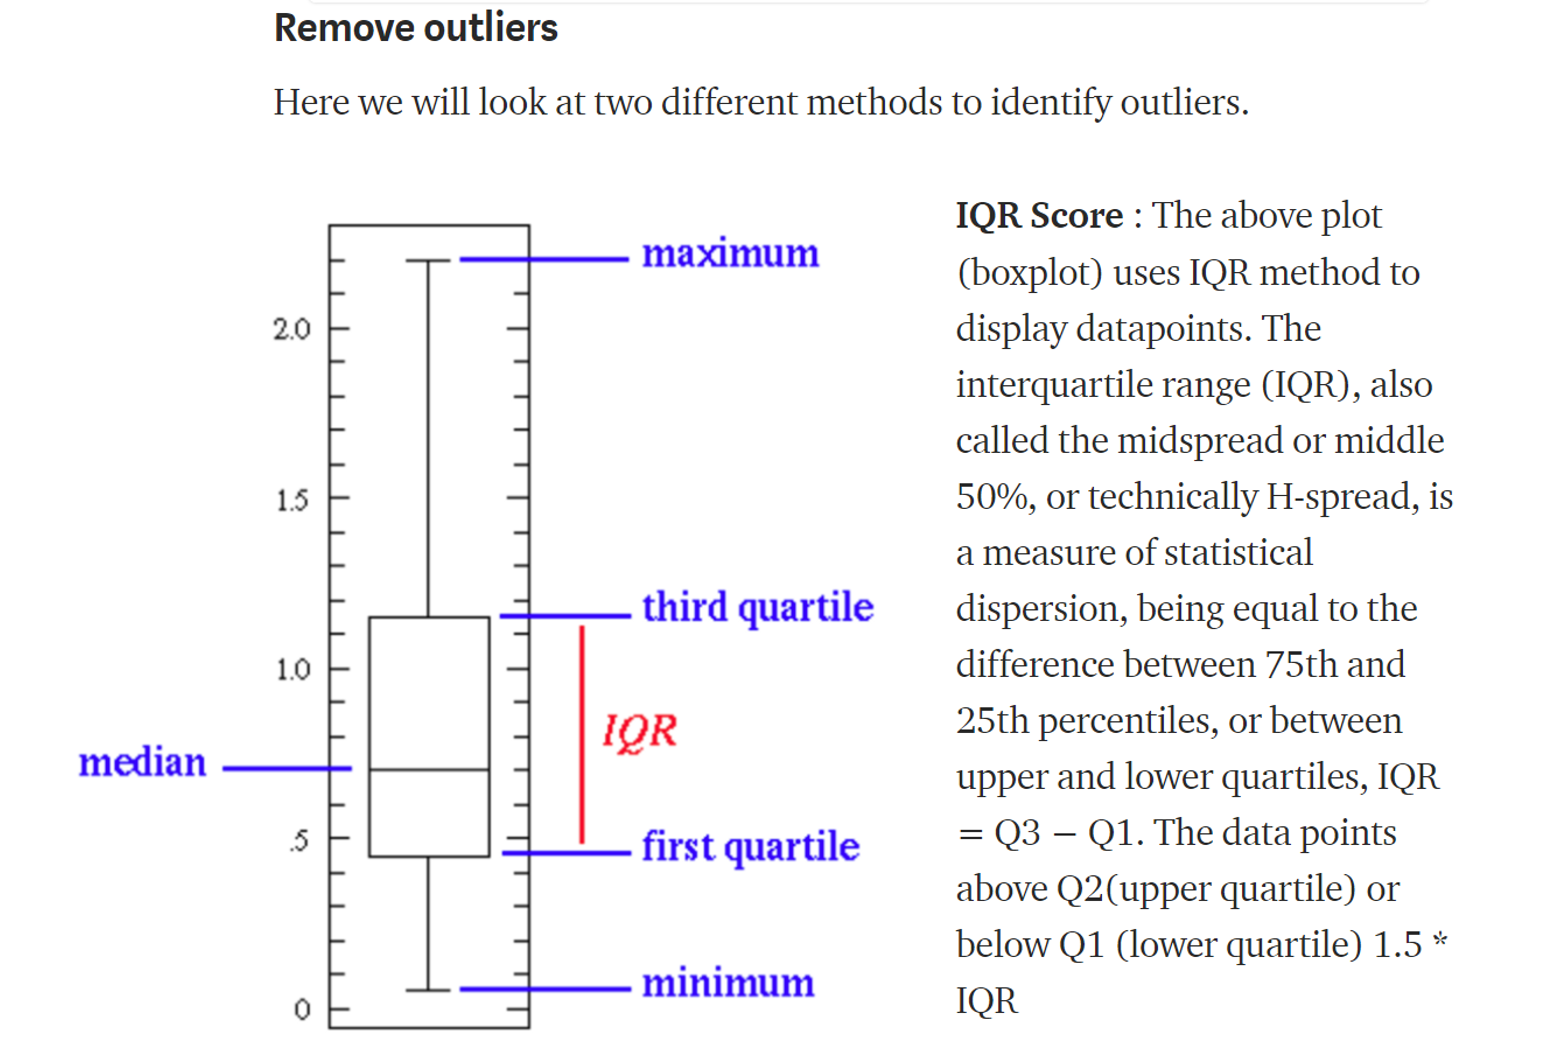


we can calculate first IQR and then the min and max values in the following way:
   - IQR= third quartile - first quartile
   - maximum= third quartile + 1,5*IQR
   - minimum= first quartile - 1,5*IQR

Perhaps you remember that the describe()-function listed several statistics, where the 25% value corresponds with the first quartile and 75% with the third quartile. With that information one can calculate IQR and the min and max value.

In [ ]:
# Example: Calculating the whiskers' min and max line which according to the definition are calculated by:
# see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html
# whisker-min=q25 - 1.5*(q75 - q25)
# whisker-max=q75 + 1,5*(q75 - q25)
# with q25 being the value for the 25% quartile and q75 for 75%

# testing this for 'Alcohol'. First and third quartil are calculated as part of the .describe()-function.
q25=dfLE['Alcohol'].describe()['25%']
q75=dfLE['Alcohol'].describe()['75%']
whiskermin=q25-1.5*(q75-q25)
whiskermax=q75+1.5*(q75-q25)
print('min= ', whiskermin)
print('max= ', whiskermax)

# See also the example and explanation on:https://medium.com/@snehal.1409/data-cleaning-4bd6beed6d92

min=  -9.0
max=  17.56


We see that the maximum-value in the boxplot corresponds very well with the calculated whiskermax-value of 17.14. But since none of the values about the alcohol-consumption in the different countries is actually negative, the minimum in the boxplot is 0.0 as well. The general rule for calculating min and max values with help of the quartiles is based on the symmetric range and does not account for special cases. 

However, we can use these min and max values as conservative limits, outside of which we can find outliers. Setting these outlier values to the nearest limit, for example, will not change the statistics of the data but eliminate the outliers.

**Limiting outliers by removing the ones outside the min/max limits**

Our aim is to remove the outliers outside the whiskers-limits. We will do that using the same iteration as before.
In the for-loop we first create the boxplot of the existing feature with outliers together with their histogram and KDE. Then we calculate the whiskermin and whiskermax values based on the statistics of the variables and delete all the values above the max value and under the min value. Finally, we add the boxplot of this new data together with its histogram and KDE to the subplot, in the same way as before. This will result in pairs of two boxplots/histograms for the same variable, showing the boxplot with outliers next to the one hopefully without or with less outliers.

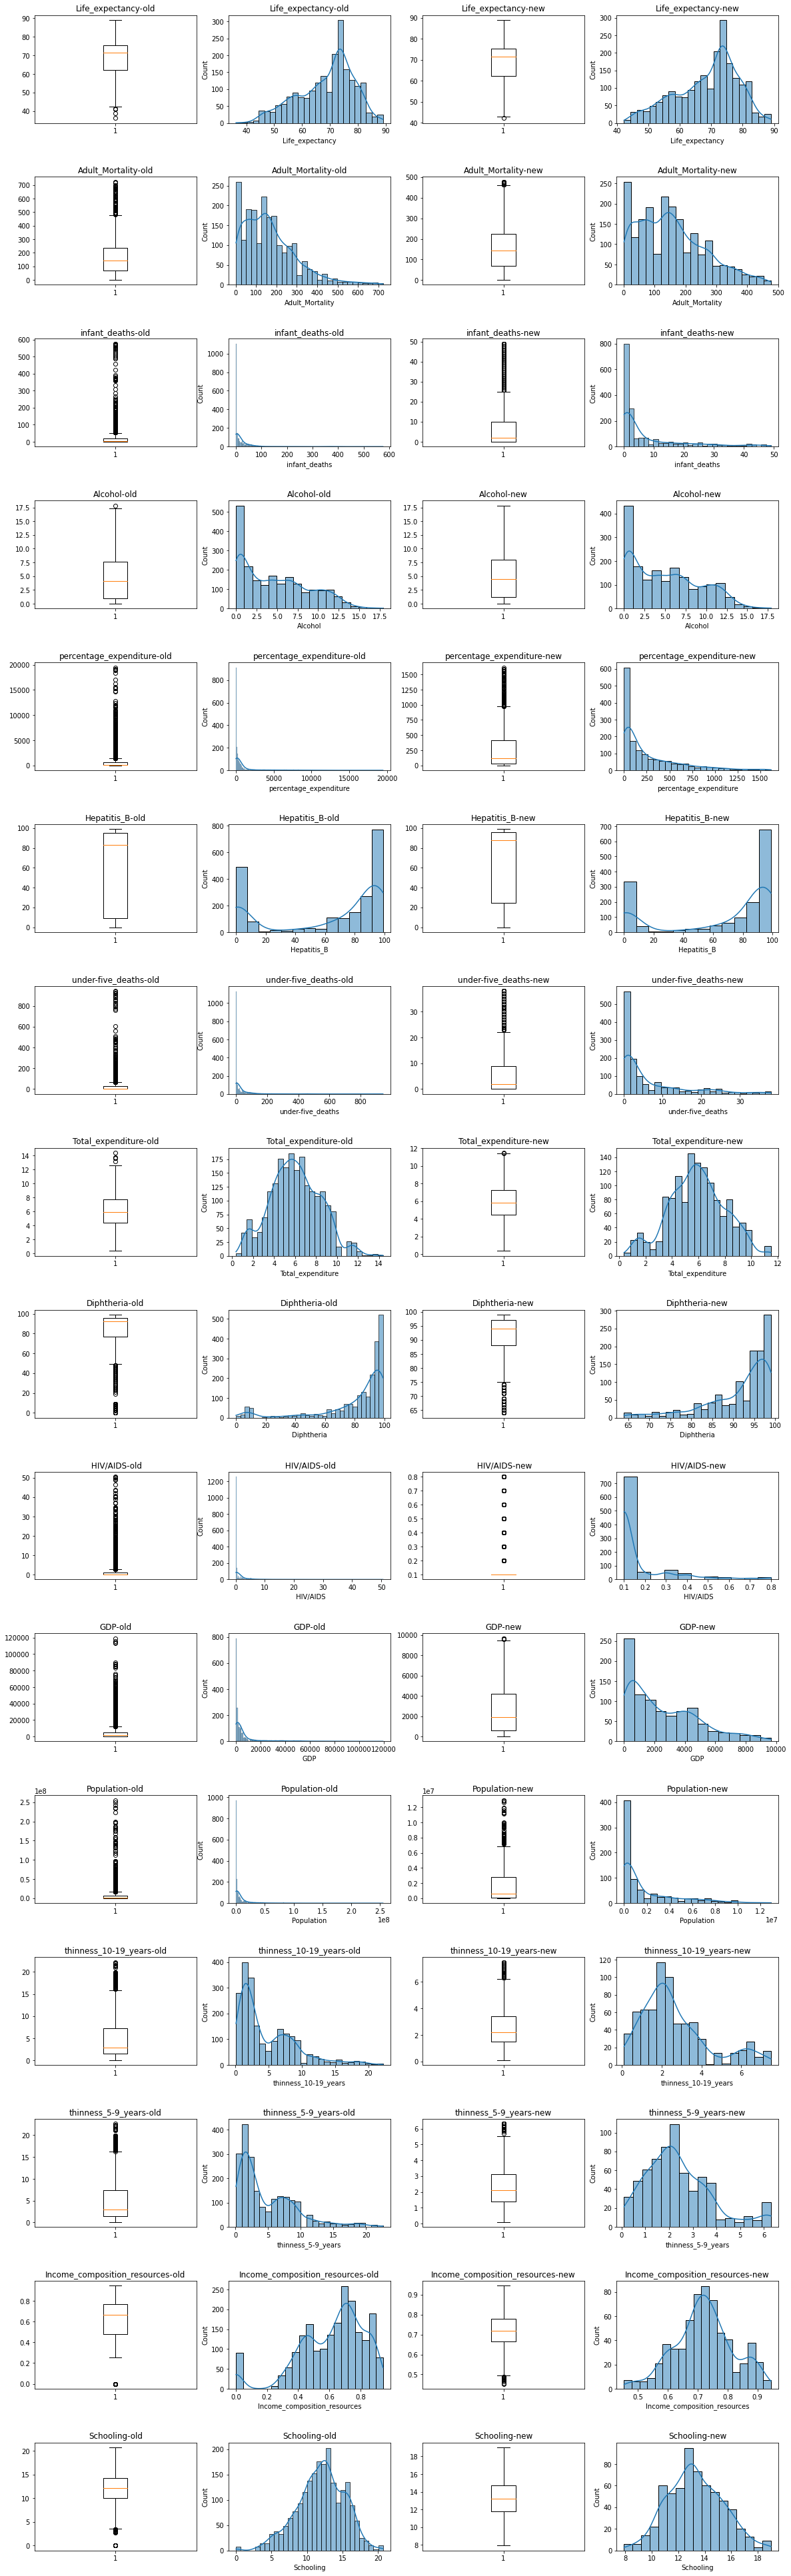

In [ ]:
# Example: Comparing boxplot and histogram/kde with and without outliers

fig=plt.figure(figsize=(20,70)) # size of one single plot-figure, found by trial-and-error
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
testData=dfLE.copy()
i=0 # setting the initial figure number to 0. One can do this a lot more elegant, but this works and is straightforward
for col in columns: #all columns except country, year and Developed are in the iteration list
    whiskermin=[]
    whiskermax=[]
    i=i+1 #increasing the number of the figure so that they find to the right place
    plt.subplot(16,4,i) # reserving the i-th place in the 9 times 4 subplot
    plt.boxplot(dfLE[col]) # creating the boxplot which is added to subplot
    plt.title(col+'-old') #setting the title of this plot in the center above the figure (= default)
    i=i+1 #increasing the number for the next figure
    plt.subplot(16,4,i) #telling the subplot where to add the next figure
    sns.histplot(x=dfLE[col], kde=True, legend=False) #create a histogram with a kde as figure
    plt.title(col+'-old') #setting title of the histogram
    i=i+1
    q25=testData[col].describe()['25%']
    q75=testData[col].describe()['75%']
    whiskermin=q25-1.5*(q75-q25)
    whiskermax=q75+1.5*(q75-q25)
    #whiskermin=q25-1.1*(q75-q25)
    #whiskermax=q75+1.1*(q75-q25)
    #testprint:
    ###rint(col,': whiskwermin= ',whiskermin,' whiskermax= ',whiskermax)
    delIndex=testData[((testData[col] >= whiskermax) | (testData[col] <= whiskermin))].index
    testData=testData.drop(delIndex)
    plt.subplot(16,4,i)
    plt.boxplot(testData[col])
    plt.title(col+'-new')
    i=i+1 #increasing the number for the next figure
    plt.subplot(16,4,i) #telling the subplot where to add the next figure
    sns.histplot(x=testData[col], kde=True) #create a histogram with a kde as figure
    plt.title(col+'-new') #setting title of the histogram
fig.savefig(outputFilePath+'EliminationOutliers.jpg') #saving the figure in a file

In [ ]:
# Determining the number of rows left
print('original number of rows: ',dfLE.shape[0])
print('number of rows left: ',testData.shape[0])

original number of rows:  2086
number of rows left:  630


In [ ]:
#There are still some outliers left in the boxplots. We could change the max-and min-limits of our whiskers by
#changing the factors from 1.5 to lower values. Once you are pleased with the results you can copy back testData to dfLE.
dfLE=testData.copy()

## 7. Looking at relations between variables (Bivariate data analysis)
Now that the single variables are more or less 'clean' we can start looking for relations between them. One way is to calculate their correlations and to draw heatmaps of the mutual correlations between the features.

### 7.1 Correlation between variables
Correlation is a statistical term and commonly refers to the degree to which a pair of variables are linearly related, see: https://en.wikipedia.org/wiki/Correlation_and_dependence . The more correlated random variables are the more dependent they are. If their correlation is zero, they are independent of each other.

Analyzing the relation and dependency in our data can serve different purposes:
1. We want to check if known dependencies actually show up as correlations.
2. We are curious to find out about unexpected correlations or independencies.
3. Specifically, we are wondering which of the variables the variable 'life-expectancy' is highly correlated to. That is the same as asking which variables are most important for a longer or shorter life.


Correlations can be calculated using the corr()-function in pandas, see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr

However, this leads to a table that is too large to be readable. A better way to visualize the correlations between many variables are heatmaps, see: https://seaborn.pydata.org/generated/seaborn.heatmap.html

7.1.1 Heatmaps
By coloring the correlation values with a range of colors, one can get a better overview over the content in the correlation matrix. This is the idea behind heatmaps which originally are used in physics to visualize the heat variations as measured by thermographic cameras. In the following example, 'stronger' colors indicate higher correlations, red for positive correlations and blue for negative correlations. The code is adopted from the example on: https://www.kaggle.com/philbowman212/life-expectancy-exploratory-data-analysis

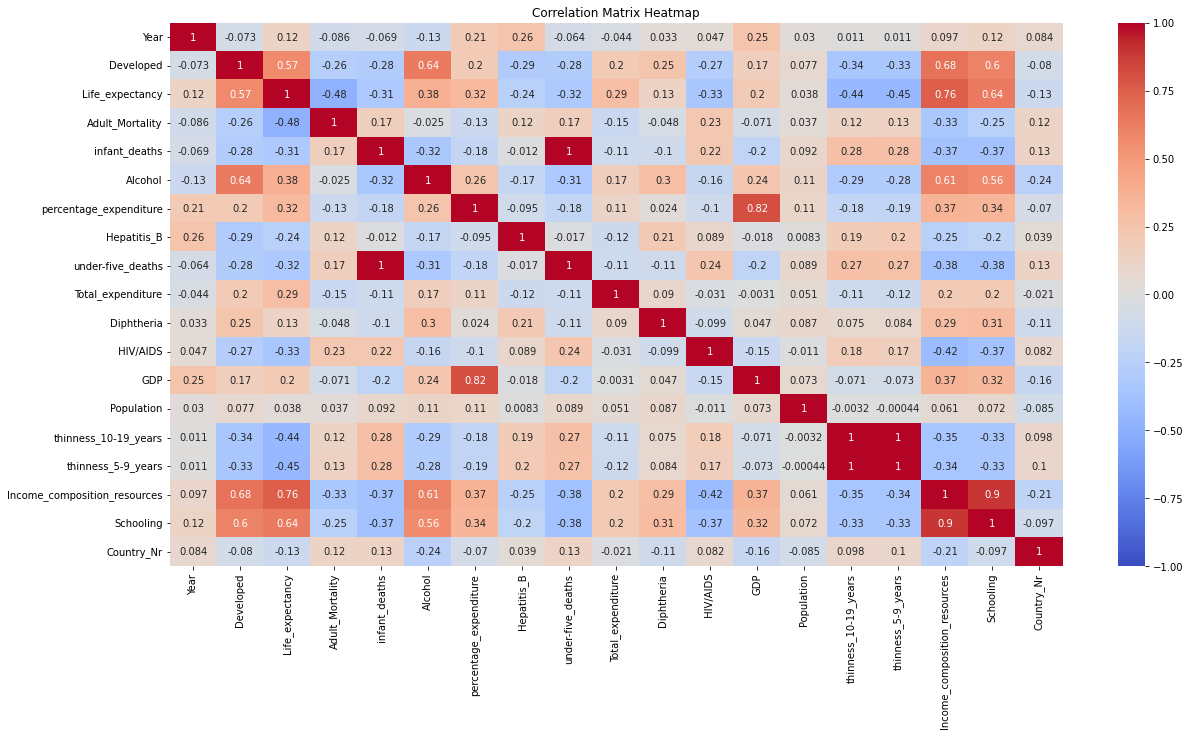

In [ ]:
#Example: Heatmap of the life-expectancy data set
#adding a 'mask' results in a diagonal matrix without redundancy
#mask = np.triu(dfLE.corr()) #using this map reduces the table into a diagonal form
plt.figure(figsize=(20,10))
#sns.heatmap(dfLE.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
sns.heatmap(dfLE.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Studying this heatmap we can find:

- obvious correlations that test the credibility of the data. E.g. if these correlations would not be high (positive or negative) something would really be wrong:
    - Adult mortality and life expectancy have a clear inverse correlation.
    - Infant_deaths and Under_five_deaths have strong positive correlation.
    - Percentage expenditure and GDP have a strong positive correlation.
    - thinness 5-9 years and thinness 10-19 years are positive correlated

- some less obvious but interesting general insights:
    - infant deaths is negative correlated with alcohol, income compostition of resources and schooling.
    - Schooling and Alcohol are positive correlated.
    - Schooling is higly correlated with income composition of resources.
    - Clearest correlation of countries with any of the other variables lies with alcohol.
    
- important correlations with life_expectancy and Developed:
    - Life_expectancy has positive correlations with developed, alcohol, percentage expenditure, income composition of resources, and scooling
    - Life_expectancy has negative correlations with adult mortality, infant deaths, under five deaths, HIV/AIDS, and thinness.
    
    - Developed has positive correlations to life expectancy, alcohol, income composition of resources, and schooling.
    - Developed has negative correlations with thinness 5-19 years.

#### 7.1.2 Scatterplots
Another way to graphically visualize relationships between two variables is to plot their values on the x- and y-axis. Such two-dimensional plots are called scatterplots. The stronger the linear correlation is between the variables the closer the points in the plot will be near the diagonal straight line. Uncorrelated variables will produce clouds of points dispersed in the plane. Scatterplots can be drawn from DataFrames, matplotlib's plt or Seaborns sns.

As mentioned before, we are interested in finding the variables that are correlated to life expectancy. We have identified 6 interesting variables that are correlated with life expectancy. A pairwise comparison in form of scatterplots can visualize which ones of these features are correlated with one another.

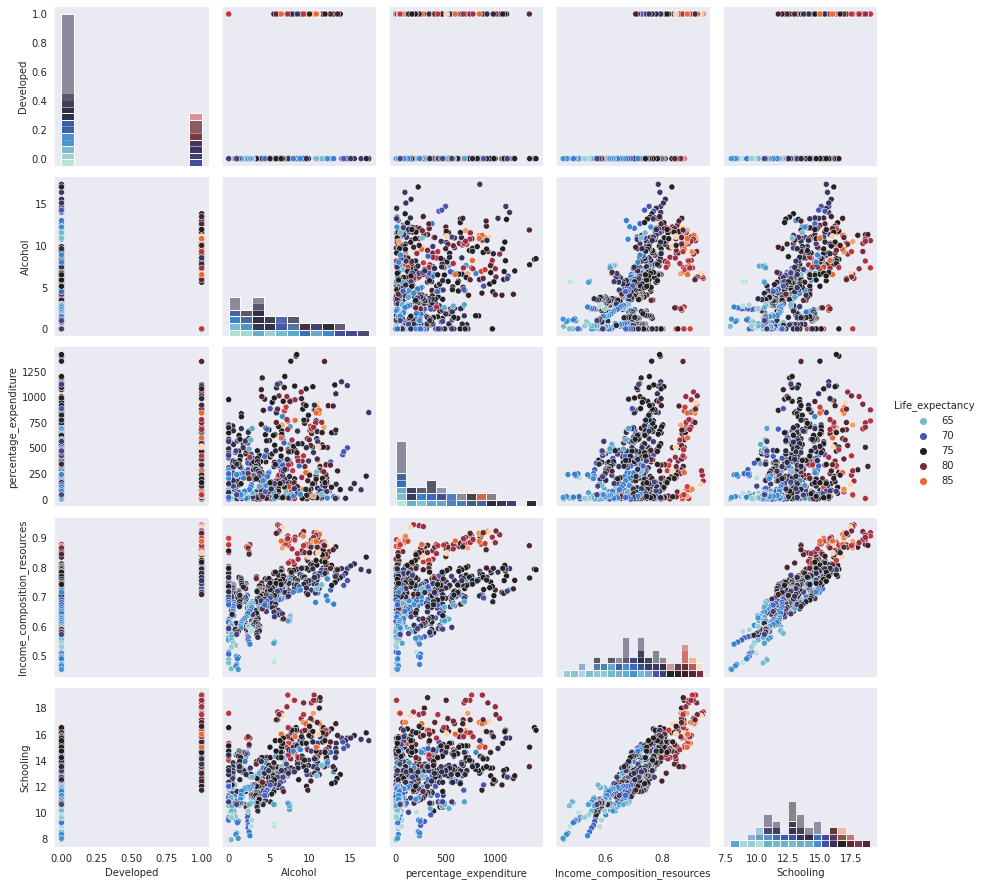

In [ ]:
# Example: Use of seaborns pairplot to plot all pairs of scatterplots
# see: https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.set_style('dark')
#palette="YlOrBr"
#palette="icefire"
#palette="cubehelix"
#sns.color_palette("icefire", as_cmap=True)
sns.pairplot(dfLE.loc[:,['Life_expectancy','Developed', 'Alcohol', 'percentage_expenditure', 
                      'Income_composition_resources', 'Schooling']], hue='Life_expectancy',diag_kind='hist', palette="icefire")

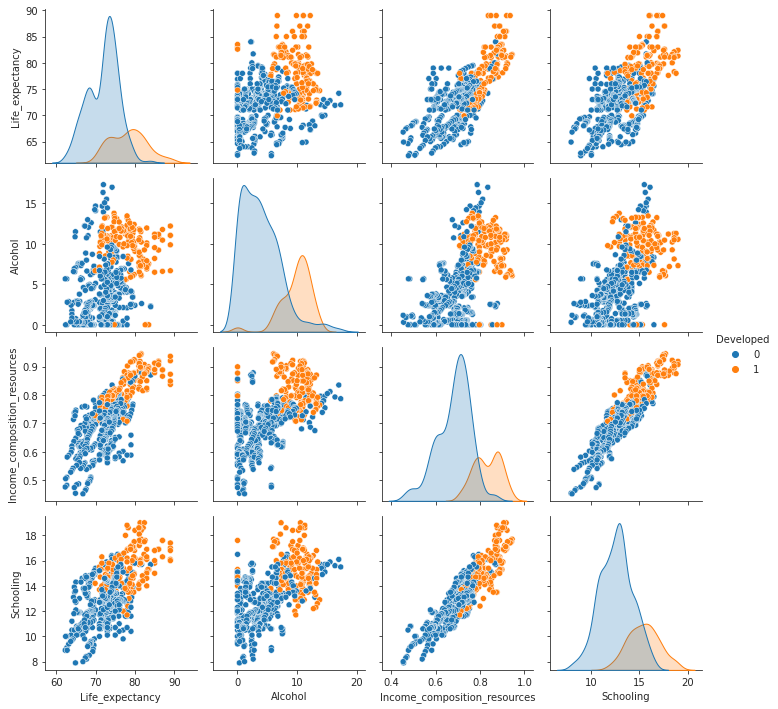

In [ ]:
# Example: Pairwise scatterplot with coloring of 'Developed'
sns.set_style('ticks')
sns.pairplot(dfLE.loc[:,['Developed','Life_expectancy', 'Alcohol','Income_composition_resources', 'Schooling']], hue='Developed')

#### 7.1.3 Joint distribution plots with a regression fit
Using the seaborn function 'jointplot()' we can plot the joint distribution between variables, together with the single distributions of the variables. We can illustrate this on the example with 'income_composition_resources' versus 'Schooling'.
For a description of this function with examples, see: http://seaborn.pydata.org/generated/seaborn.jointplot.html

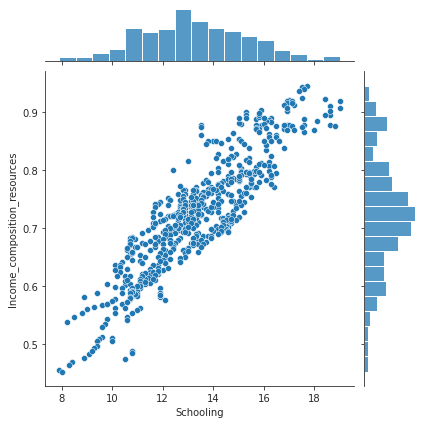

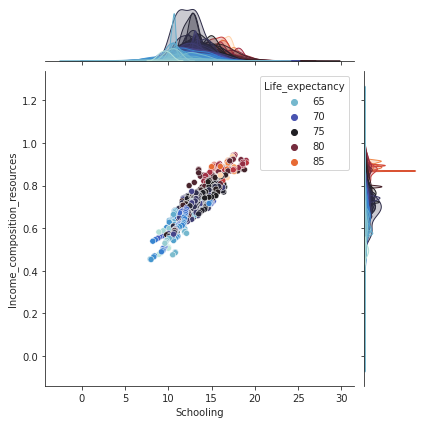

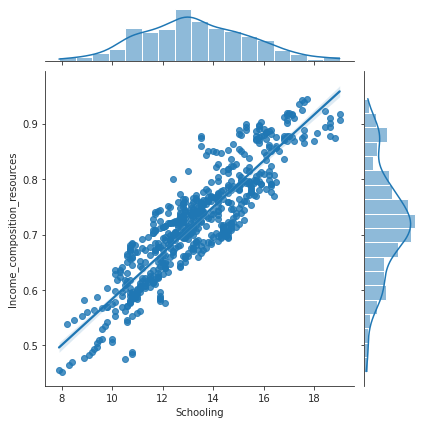

In [ ]:
#Example: Joint distribution plots
# easiest version:
sns.jointplot(data=dfLE, x='Schooling', y='Income_composition_resources')
# adding hue='Life_expectancy' with palette="icefire"
sns.jointplot(data=dfLE, x='Schooling', y='Income_composition_resources',hue='Life_expectancy',palette="icefire")
# adding some automatic kernel density estimation and regression
sns.jointplot(data=dfLE, x='Schooling', y='Income_composition_resources', kind='reg')

#### 7.1.4 Plotting category dependencies
The use of 'hues' in the scatterplots above illustrate how useful it is to be able to visualize the dependency of relations between variables depending on other, various discrete factors.
An example of such a factor is whether a country is considered to be 'Developed' or 'Developing'. We can use this factor to see what role it plays for life expectancy.
The seaborn-function to use was formerly called 'factorplot()' and was replaced by 'catplot', see: https://seaborn.pydata.org/generated/seaborn.catplot.html?highlight=catplot#seaborn.catplot

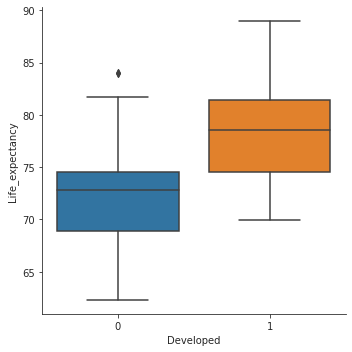

In [ ]:
#Example of catplot, comparing the distributions for life expectancy based on the factor 'Developed'
sns.catplot(data=dfLE,x="Developed",  y="Life_expectancy", kind="box")

- The figure shows how much the mean-values and distributions of the life expectancy differ between developed and developing countries!

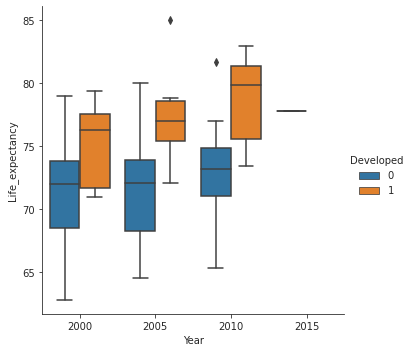

In [ ]:
#Example of catplot, comparing the distributions for life expectancy based on the factor 'Developed' over the years 2000 to 2015
sns.catplot(data=dfLE[dfLE['Year'].isin([2000,2005,2010,2015])],x="Year",  y="Life_expectancy", kind="box", hue='Developed')

- The figure above illustrates the mean values and distributions of life expectancy over a 15 year time period.
- While the mean values have increased minimal in developing countries, it has improved much more in developed ones.

### 7.5 Hypotheses testing
As the figures above illustrate, we know that there is a big difference regarding the life expectancy between the developed and the developing world. How can we know if this is statistically significant? After all, we have a lot more data from developing countries than from developed. Maybe this is a result of this unbalance?

One way to statistically test the significance of differences is to use the t-test, see Wikipedias explanation on: https://en.wikipedia.org/wiki/Student%27s_t-test
Very much simplified, the t-test, also known as Student's t-test, can be used to determine if the means of two sets of data are significantly different from each other. The t-test is a statistical hypothesis test towards a null hypothesis which is a general statement or default position that there is no relationship between two measured phenomena.

From scipy we can import the statistical stats library where the ttest is a part of and described here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

The function ttest_ind() calculates the result of the test (value T) and the p-value. T is the calculated difference represented in units of standard error. The greater the magnitude of T, the greater the evidence against the null hypothesis. The closer T is to 0, the more likely there isn't a significant difference. Once the T value and degrees of freedom are determined, a p-value can be found using a table of values from Student's t-distribution. If the calculated p-value is below the threshold chosen for statistical significance (usually the 0.10, the 0.05, or 0.01 level), then the null hypothesis is rejected in favor of the alternative hypothesis. The larger the absolute value of the T-value, the smaller the p-value, then the greater the evidence against the null hypothesis

For typical analysis, using the standard α = 0.05 cutoff, the null hypothesis is rejected when p < .05 and not rejected when p > .05. The p-value does not, in itself, support reasoning about the probabilities of hypotheses but is only a tool for deciding whether to reject the null hypothesis.

Let us see what king of values we get from the t-test for the diference between life expectancies.

In [ ]:
#comparing the difference in the average of life-expectancy between developed and developing countries:
print('Average life expectancy in developed countries: ',dfLE.loc[dfLE.Developed==1,'Life_expectancy'].mean())
print('Average life expectancy in developing countries: ',dfLE.loc[dfLE.Developed==0,'Life_expectancy'].mean())

Average life expectancy in developed countries:  78.36459627329192
Average life expectancy in developing countries:  71.93113006396588


In [ ]:
#Example: running the t-test on life expectancy
developed_le = dfLE.loc[dfLE.Developed==1,'Life_expectancy']
developing_le = dfLE.loc[dfLE.Developed==0,'Life_expectancy']
stats.ttest_ind(developed_le, developing_le, equal_var=False)

Ttest_indResult(statistic=16.11035656221444, pvalue=2.7594173705596845e-40)

The results show that the T-value is 16.1 and p very close to 0. (2.76 *e-40 is the scientific notation for a number that starts with 0. and continues with around 40 zeroes before a 2 appears! )
The p-value is therefore much less than 0.05 and the test confirms a statistically significant difference.

## PART III: USEFUL FUNCTIONS

## A. Saving the Pre-Processed Data
At the end of this tutorial we now have some pre-processed datasets that contain no missing data, have corrected entries and categories that are converted to numerical values.

Before closing the tutorial, we want to save this data so that we can easely re-load it again once we continue working with it.


### A.1 Pickling and Unpickling Data
Most programming languages allow to save variables with their values on hard-disks from where they easely can be re-loaded again. This is convinient, especially since the values otherwise are lost when exiting from the program and need to be recreated from scratch. 
In Python, the process of saving variables on disk is called 'pickling' and loading variables from disk is called 'unpickling'. All types of variables and data can be pickled and unpickled.

In [ ]:
# Example of pickling the variable dfLE into a file with the name "LifeExpectancy-dfLE.pickle"
d_out=open(outputFilePath+"LifeExpectancy-dfLE.pickle","wb") #"wb" defines the writing mode for the file
pickle.dump([dfLE],d_out) #dump the content of variable defLE into the file
d_out.close() # never forget to close an open file!

The file with the name "LifeExpectancy-dfLE.pickle" should have been created in the same folder as this notebook.

Make sure that you successfully can 'unpickle' your data from the file before quitting the tutorial:

In [ ]:
# Example of unpickling the variable from the file with the name "LifeExpectancy-dfLE.pickle"
d_in = open(outputFilePath+"LifeExpectancy-dfLE.pickle","rb") # "rb" defines the reading mode for the file
# using another variable name instead of dfLE
[testpickle] = pickle.load(d_in)
d_in.close() # never forget to close an open file!

In [ ]:
# proof that it worked
testpickle.head(3)

,Country,Year,Developed,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,under-five_deaths,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10-19_years,thinness_5-9_years,Income_composition_resources,Schooling,Country_Nr
16,Albania,2015,0,77.8,74,0,4.60,364.975229,99.0,0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,1
17,Albania,2014,0,77.5,8,0,4.51,428.749067,98.0,1,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,1
18,Albania,2013,0,77.2,84,0,4.76,430.876979,99.0,1,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2,1


In [ ]:
# You can also use the compare-function to compare two dataframe variables row by row:
diff = testpickle.compare(dfLE, align_axis = 0)
print("Difference between two DataFrames:\n", diff)

Difference between two DataFrames:
 Empty DataFrame
Columns: []
Index: []


### A.2 Saving the resulting dataset in excel

In the case of data that is stored in DataFrames variables, it makes sense to save all of the data into an excel sheet as long as the dataset is not bigger than what Excel can manage. 
The advantage of having all the data in excel is that the functionality of excel can be used to analyze or visualize the data and that it is easy to load data from excel into DataFrames again.

In [ ]:
# Example of saving the DataFrame dfLE in the excel file with the name "LifeExpectancy.xlsx" 
# into the excel-sheet dfLE.
# see: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel-writer
dfLE.to_excel(outputFilePath+'LifeExpectancy.xlsx', sheet_name='dfLE')

In [1]:
# In case one would like to save several DataFrame variables (e.g. dfLE, LEAggregated, and rawdata) in the same excel-file on 
# different sheets one needs an "ExcelWriter"
# 
with pd.ExcelWriter(outputFilePath+'excel_file.xlsx') as writer:
    dfLE.to_excel(writer, sheet_name='dfLE')
    LEAggregated.to_excel(writer, sheet_name='LEAggregated')
    rawdata.to_excel(writer, sheet_name='rawdata')

NameError: ignored